# **Segregation of the Dataset and Mean Difference Analysis**

## _ETL Workflow Notebook 5_

## Content:
1. Calculating general statistics for a given column;
2. Getting data quantiles for a given column;
3. Getting a particular P-percent quantile limit for a given column;  
4. Selecting subsets from a dataframe (using row filters) and labelling these subsets;
5. Estimating ideal sample size for tests;
6. Performing Analysis of Variance (ANOVA); and obtaining box plots or violin plots;
7. Performing AB-Tests.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [1]:
import load
from idsw import *

/content/idsw/datafetch/core.py:1713: SyntaxWarning: invalid escape sequence '\p'
  engine = create_engine(r"sqlite:///C:\path\to\foo.db")
/content/idsw/datafetch/pipes.py:317: SyntaxWarning: invalid escape sequence '\s'
  txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
/content/idsw/datafetch/pipes.py:1271: SyntaxWarning: invalid escape sequence '\('
  To find a spec like "TensorSpec(shape=(None, *, *)" the Regex would be: r"TensorSpec\(shape=\(None, (\d+), (\d+)\)"
/content/idsw/modelling/core.py:2751: SyntaxWarning: invalid escape sequence '\{'
  * Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each
/content/idsw/modelling/core.py:2846: SyntaxWarning: invalid escape sequence '\{'
  $\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$,


Package copied to the working directory.
To import its whole content, run:

    from idsw import *



/content/idsw/modelling/deep.py:239: SyntaxWarning: invalid escape sequence '\%'
  print("In this example, we added Dropout(0.5). It means that you lose 50\% of nodes. If using Dropout(0.2), you would lose 20\% of nodes.")
/content/idsw/modelling/deep.py:445: SyntaxWarning: invalid escape sequence '\%'
  print("In this example, we added Dropout(0.5). It means that you lose 50\% of nodes. If using Dropout(0.2), you would lose 20\% of nodes.")
/content/idsw/etl/core.py:2462: SyntaxWarning: invalid escape sequence '\d'
  r'st\d\s\w{3,10}'
/content/idsw/etl/core.py:2583: SyntaxWarning: invalid escape sequence '\d'
  - re.findall(r"\d+-\d+", text) - returns: ['4-3', '10-04']
/content/idsw/etl/core.py:2632: SyntaxWarning: invalid escape sequence '\s'
  - If we do re.findall(r"the\s\d+s", my_string) - returns: ['the 80s', 'the 90s']
/content/idsw/etl/core.py:2720: SyntaxWarning: invalid escape sequence '\d'
  - Example: re.match(r"\d+", "12345bcada") - returns: <_sre.SRE_Match object; span=(0

## **Call the functions**

### **Importing the dataset**

In [2]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt),
## JSON, txt, or CSV (comma separated values) files. Tables in webpages or html files can also be read.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset3.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or,
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.
# Also, html files and webpages may be also read.

# You may input the path for an HTML file containing a table to be read; or
# a string containing the address for a webpage containing the table. The address must start
# with www or htpp. If a website is input, the full address can be input as FILE_DIRECTORY_PATH
# or as FILE_NAME_WITH_EXTENSION.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True
# if you want to read a file with txt extension containing a text formatted as JSON
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’,
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’,
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}


HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = ","
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " "
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.

SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep.
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Dataset extracted from dataset3.csv. Check the 10 first rows of this dataframe:



,timestamp,Season,Repetition,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,...,Cultivar_SYN2282IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc,PH_log,IFP_log,NLP_log,NGL_log,NS_log,MHG_log,cluster,GY_log
0,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.074142,2.721295,4.587006,0.593327,1.648659,5.025195,1,8.081110
1,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.396915,2.890372,4.593098,0.559616,2.001480,4.980794,33,8.080544
2,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.955082,2.667228,4.171306,0.832909,1.974081,5.194345,46,8.199865
3,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.988984,2.734368,4.409155,0.982078,2.104134,5.237877,11,8.324278
4,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.010963,2.985682,3.891820,0.494696,1.280934,5.081466,42,8.141289
5,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.104295,2.760010,4.117410,0.797507,1.791759,5.100659,29,8.140525
6,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.265493,2.965273,4.290459,0.717840,1.856298,5.177448,32,8.162262
7,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,3.985273,2.639057,3.891820,0.978326,1.648659,5.120028,55,7.988859
8,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.461300,3.135494,3.784190,0.693147,1.568616,5.235750,44,8.382154
9,2022-12-01,1,1,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,...,0.0,0.0,4.021774,2.610070,3.793239,0.688135,1.029619,5.279491,31,8.220513


In [ ]:
np.unique(dataset.cluster)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

### **Calculating general statistics for a given column**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'GY_log'
# COLUMN_TO_ANALYZE = string (inside quotes) containing the name of the column that will be analyzed.
# e.g. column_to_analyze = "column1" will analyze the column named as 'column1'.

# Statistics dataframe saved as general_stats.
# Simply modify this object on the left of equality:
general_stats = column_general_statistics (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE)

General descriptive statistics from variable GY_log, ignoring missing values:



,GY_log
count,320.000000
mean,8.125615
std,0.153877
min,7.338388
25%,8.047705
50%,8.130729
75%,8.218319
max,8.503094




Interpretation (missing values ignored):


,interpretation
statistic,
count,total of values evaluated (number of entries)
mean,mean value of the series
std,standard deviation of the series
min,minimum value observed
25% = 0.25,1st-quartile: 25% of data <= this value
50% = 0.50,2nd-quartile: 50% of data <= this value
75% = 0.75,3rd-quartile: 75% of data <= this value
max,maximum value observed




ATTENTION: This function shows the general statistics only for numerical variables.
The results were returned as the dataframe general_stats.



### **Getting data quantiles for a given column**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'GY_log'
# COLUMN_TO_ANALYZE = string (inside quotes) containing the name of the column that will be analyzed.
# e.g. column_to_analyze = "column1" will analyze the column named as 'column1'.

# Quantiles dataframe saved as quantiles_summ_df
# Simply modify this object on the left of equality:
quantiles_summ_df = get_quantiles_for_column (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE)

Quantiles returned as dataframe quantiles_summ_df. Check it below:



,,,interpretation
quantile,%,GY_log,
0.00,0,7.338388,minimum GY_log
0.05,5,7.886892,5% of data <= this value
0.10,10,7.953661,10% of data <= this value
0.15,15,7.983955,15% of data <= this value
0.20,20,8.029270,20% of data <= this value
0.25,25,8.047705,25% of data <= this value
0.30,30,8.071372,30% of data <= this value
0.35,35,8.084818,35% of data <= this value
0.40,40,8.101236,40% of data <= this value


In [ ]:
np.mean(dataset['GY_log'])

np.float64(8.125615356590615)

In [ ]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'f1_sin', 'f1_cos', 'f2_sin',
       'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
       'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos',
       'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_98R30 CE_OneHotEnc',
       'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc',
       'Cultivar_ATAQUE I2X_OneHotEnc',
       'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_ELISA IPRO_OneHotEnc',
       'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FORTALEZA IPRO_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneH

In [ ]:
low_gy = dataset[dataset['GY_log'] < 8.047705] # quantile 0.25
low_gy = low_gy.reset_index(drop=True)

high_gy = dataset[dataset['GY_log'] >= 8.218319] # quantile 0.75
high_gy = high_gy.reset_index(drop=True)

### **Performing Analysis of Variance (ANOVA); and for obtaining box plots or violin plots**

# Check categorical variables in the dataset

In [ ]:
print(np.unique(dataset['Season']))
print(np.unique(dataset['Repetition']))

[1 2]
[1 2 3 4]


Data to be plotted in a same column.

2 different labels detected: ['1', '2'].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 160

Probability that the means of the groups are the same = 63.30% (p-value = 6.330219e-01)

Calculated F-statistic for the variances = 2.285993e-01

Statistics for each detected label:

Mean value of label '1' = 8.121498e+00
Median value of label '1' = 8.126554e+00
Minimum value of label '1' = 7.338388e+00
Maximum value of label '1' = 8.503094e+00

Mean value of label '2' = 8.129733e+00
Median value of label '2' = 8.135632e+00
Minimum value of label '2' = 7.873184e+00
Maximum value of label '2' = 8.334245e+00

For a confidence level of 95%, we can accept the null hypothesis.
The means are equal for a 95% confidence level.


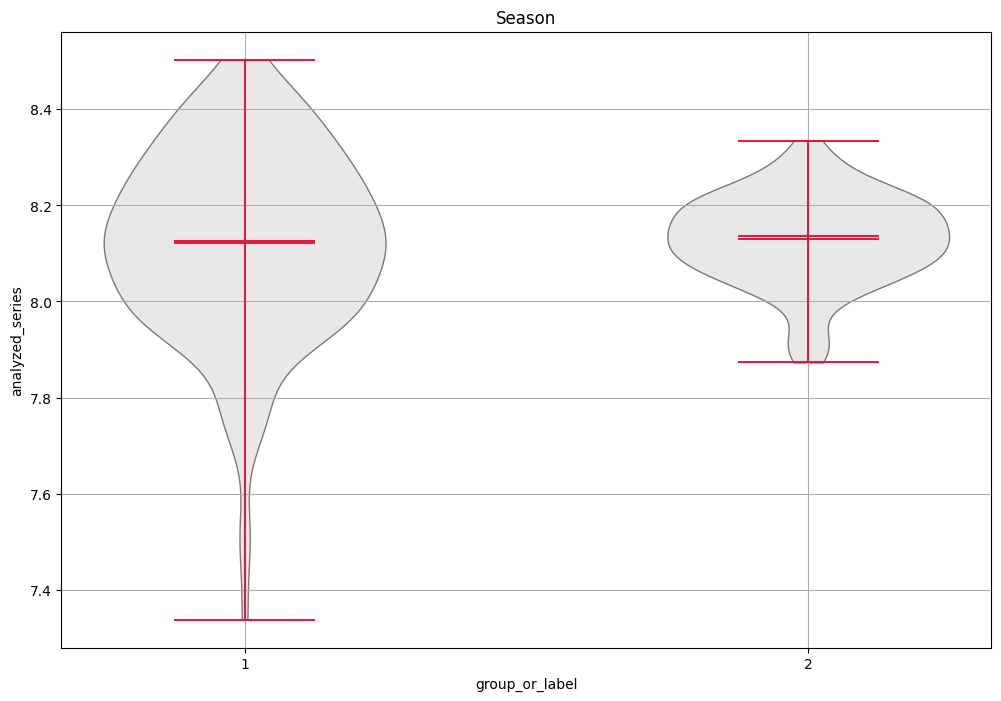



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Season' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Season' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

4 different labels detected: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)].

Analysis of variance (ANOVA) for the 4 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 80

Probability that the means of the groups are the same = 96.17% (p-value = 9.616670e-01)

Calculated F-statistic for the variances = 9.688580e-02

Statistics for each detected label:

Mean value of label '1' = 8.125898e+00
Median value of label '1' = 8.128089e+00
Minimum value of label '1' = 7.710322e+00
Max

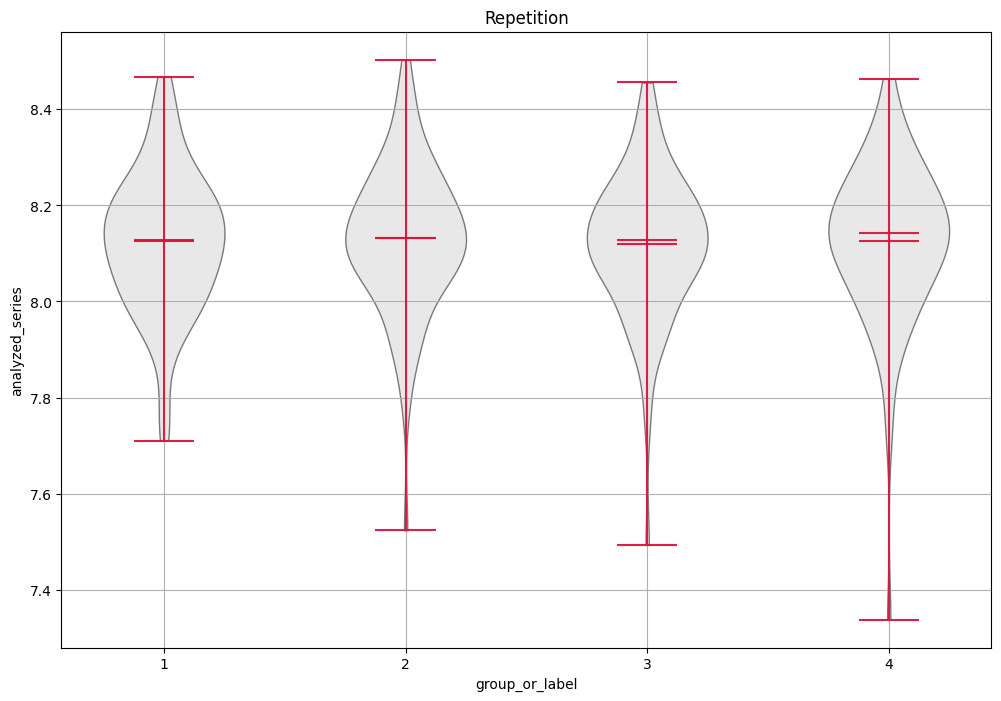



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Repetition' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Repetition' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 30.01% (p-value = 3.000593e-01)

Calculated F-statistic for the variances = 1.172184e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.125915e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

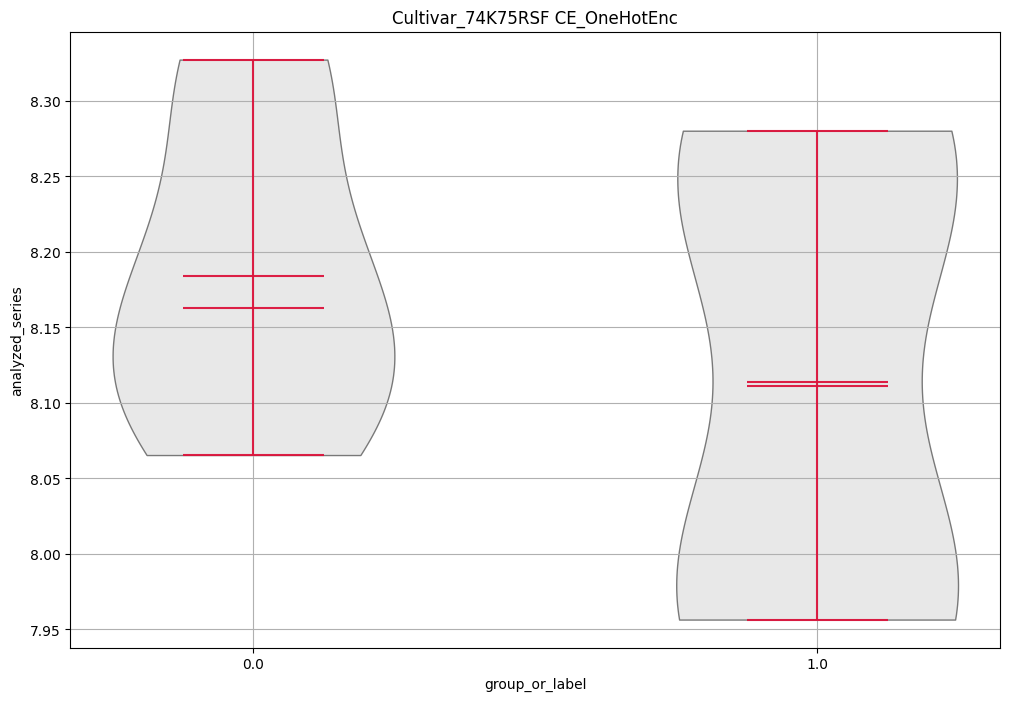



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_74K75RSF CE_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_74K75RSF CE_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 88.74% (p-value = 8.874398e-01)

Calculated F-statistic for the variances = 2.142319e-02

Statistics for each detected label:

Mean value of label '0.0' = 8.124042e+00
Median value of label '0.0' = 8.128800e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

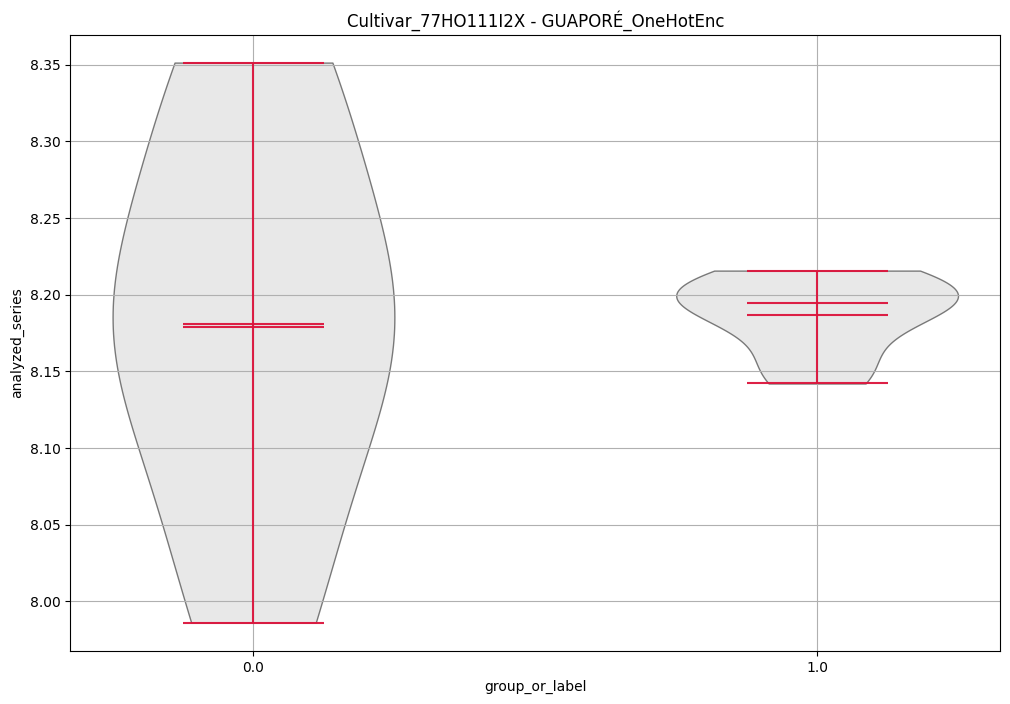



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 78.02% (p-value = 7.801686e-01)

Calculated F-statistic for the variances = 8.307827e-02

Statistics for each detected label:

Mean value of label '0.0' = 8.124871e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

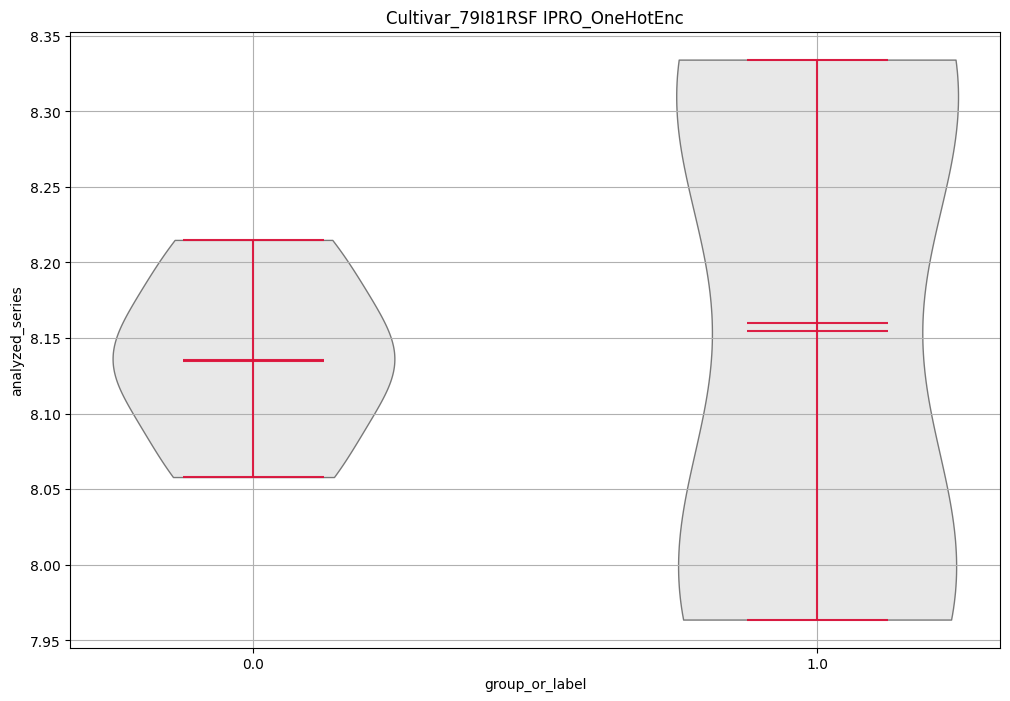



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_79I81RSF IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_79I81RSF IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 65.80% (p-value = 6.579761e-01)

Calculated F-statistic for the variances = 2.099588e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.124032e+00
Median value of label '0.0' = 8.129700e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

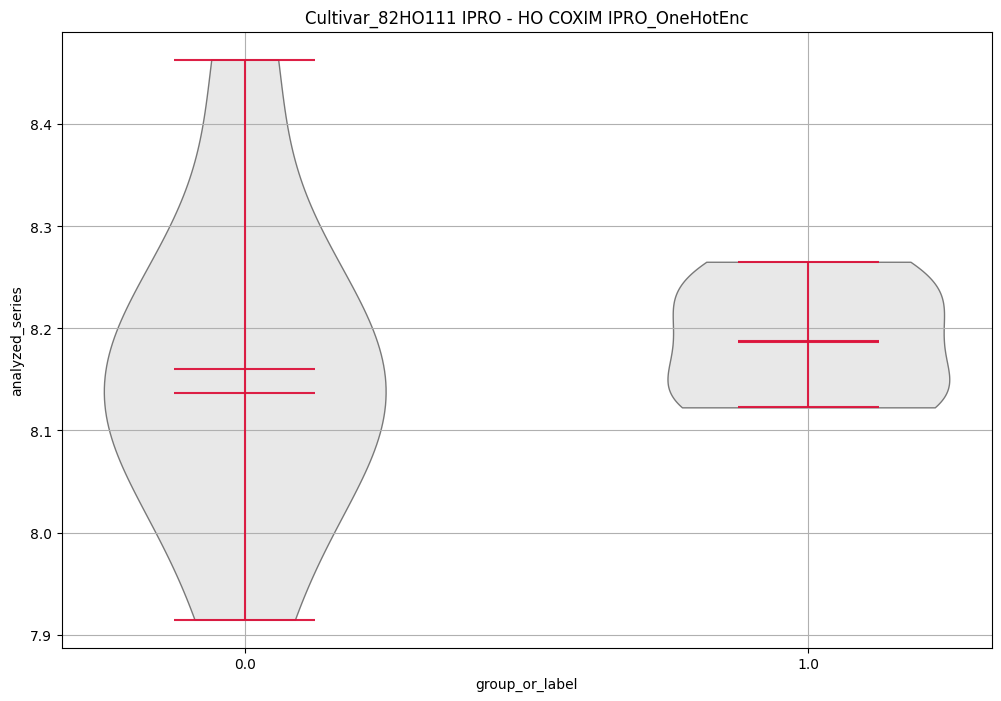



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 9.45% (p-value = 9.449259e-02)

Calculated F-statistic for the variances = 3.272776e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.130301e+00
Median value of label '0.0' = 8.133223e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

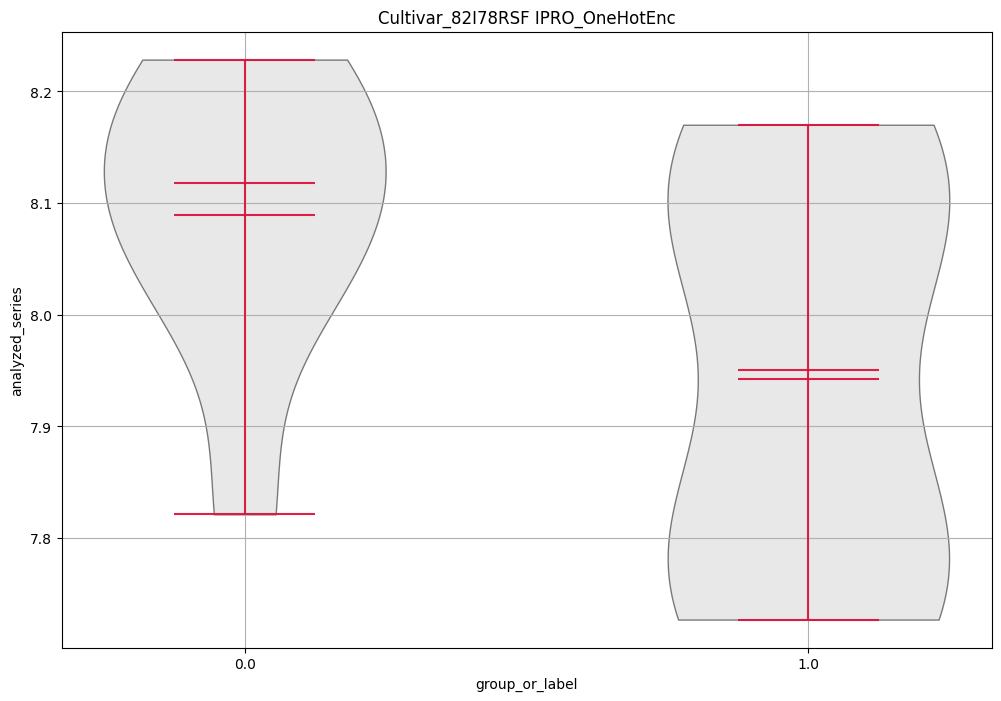



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_82I78RSF IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_82I78RSF IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 0.76% (p-value = 7.612125e-03)

Calculated F-statistic for the variances = 9.738594e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.122493e+00
Median value of label '0.0' = 8.128800e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

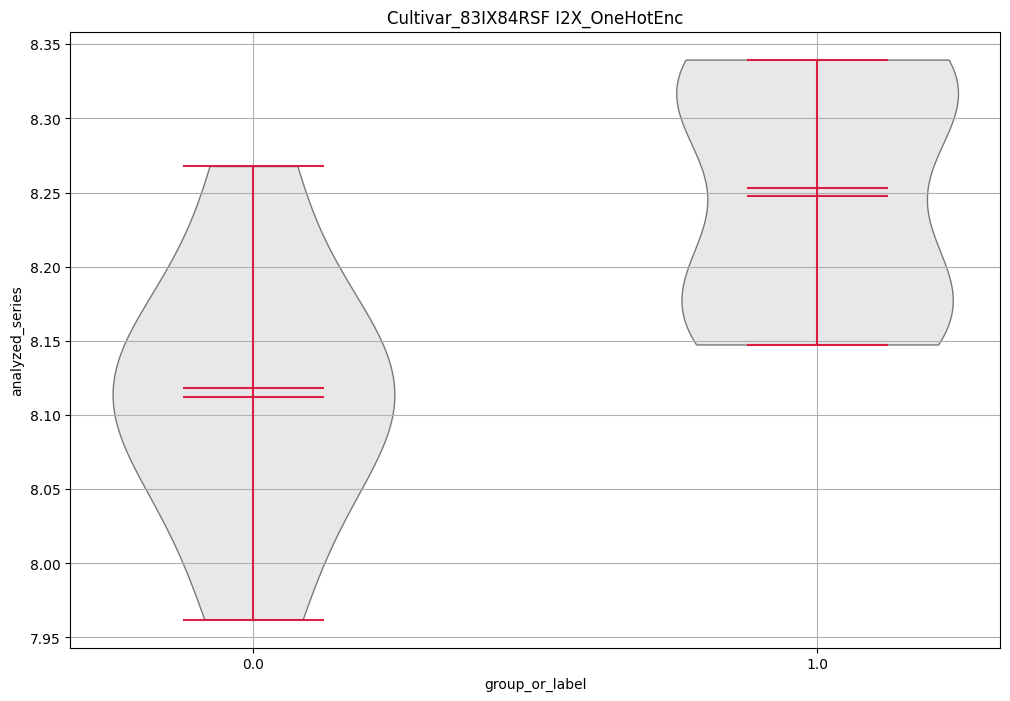



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_83IX84RSF I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_83IX84RSF I2X_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 0.16% (p-value = 1.557069e-03)

Calculated F-statistic for the variances = 2.148509e+01

Statistics for each detected label:

Mean value of label '0.0' = 8.136194e+00
Median value of label '0.0' = 8.135632e+00
Minimum value of label '0.0' = 7.727006e+00
Maximum value of 

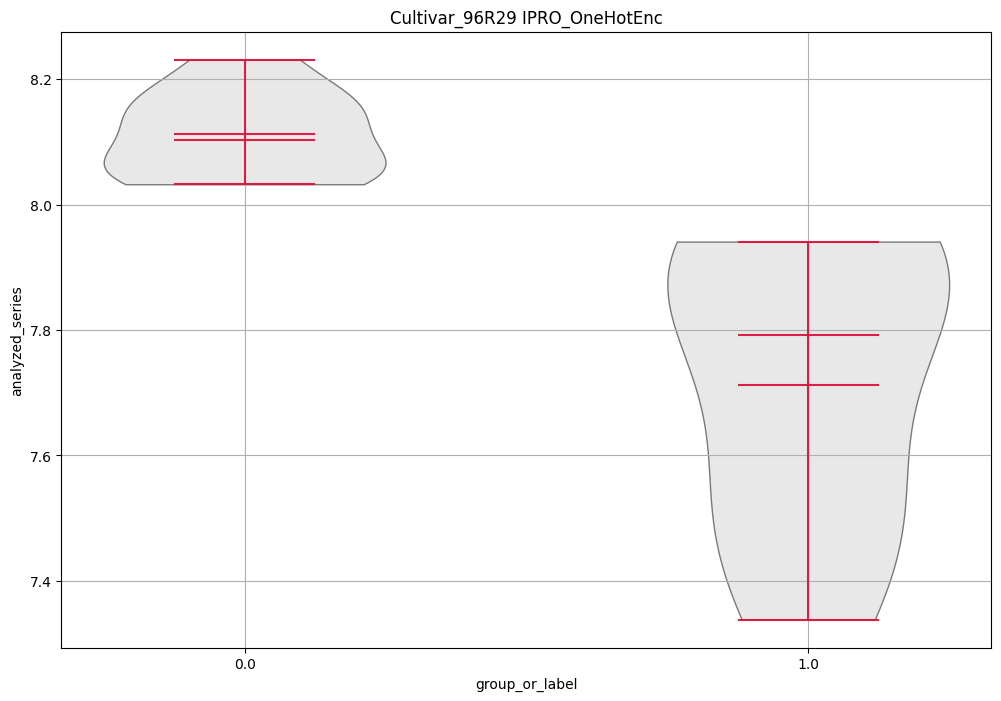



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_96R29 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_96R29 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 4.57% (p-value = 4.568227e-02)

Calculated F-statistic for the variances = 4.868376e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.128813e+00
Median value of label '0.0' = 8.135632e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

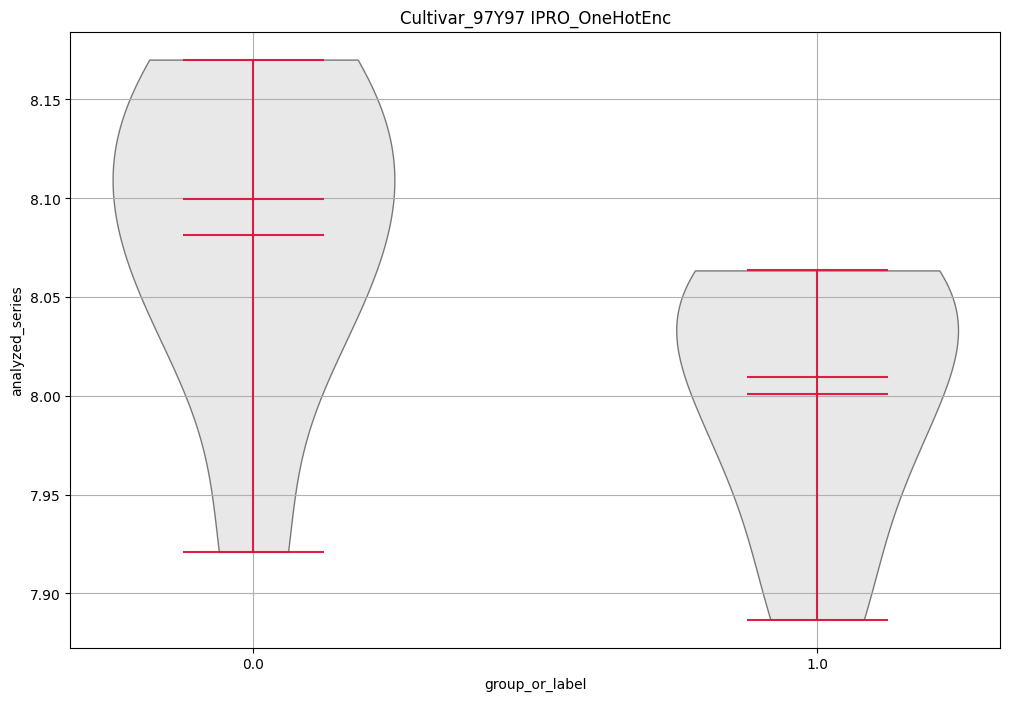



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_97Y97 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_97Y97 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 36.27% (p-value = 3.627290e-01)

Calculated F-statistic for the variances = 8.948405e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.122042e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

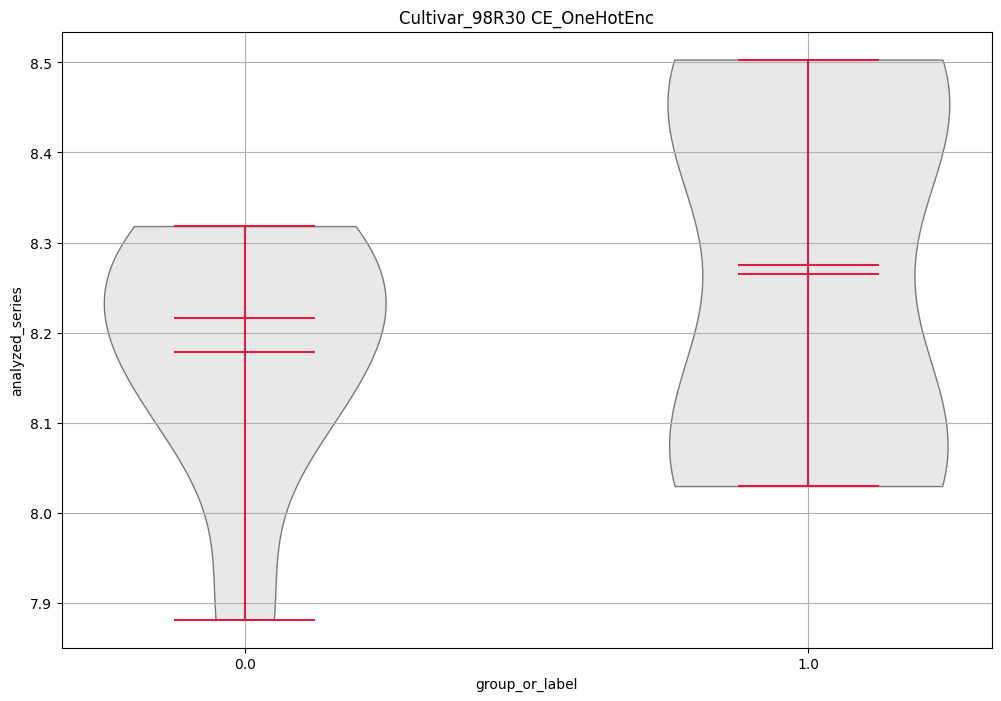



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_98R30 CE_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE ='Cultivar_98R30 CE_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 47.87% (p-value = 4.787203e-01)

Calculated F-statistic for the variances = 5.447362e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.123644e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

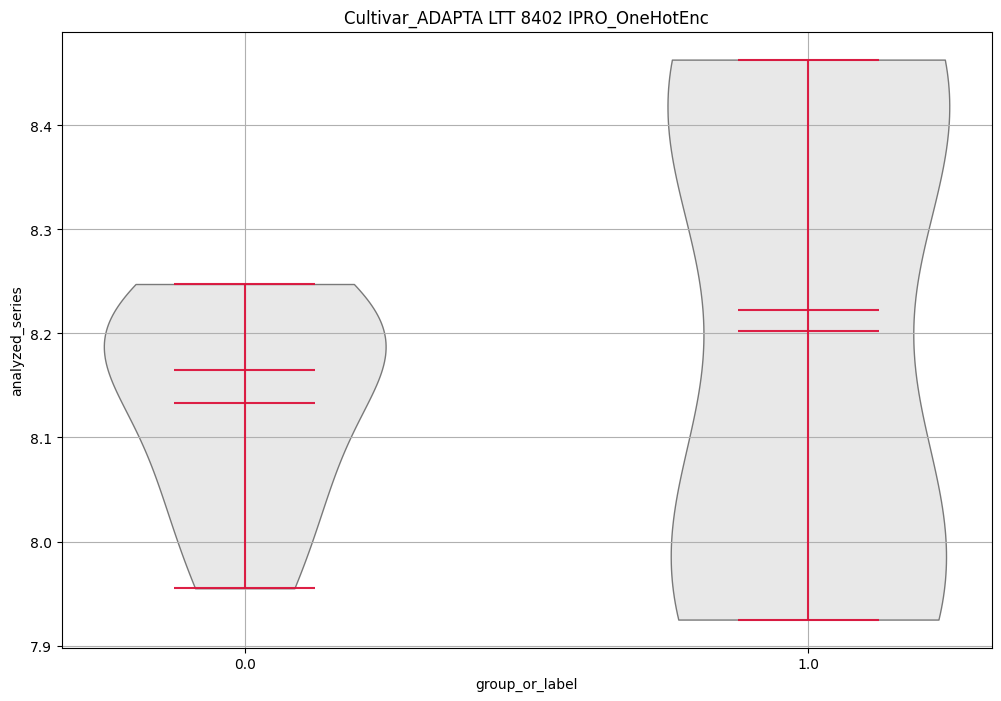



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 40.96% (p-value = 4.096020e-01)

Calculated F-statistic for the variances = 7.457463e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.123644e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

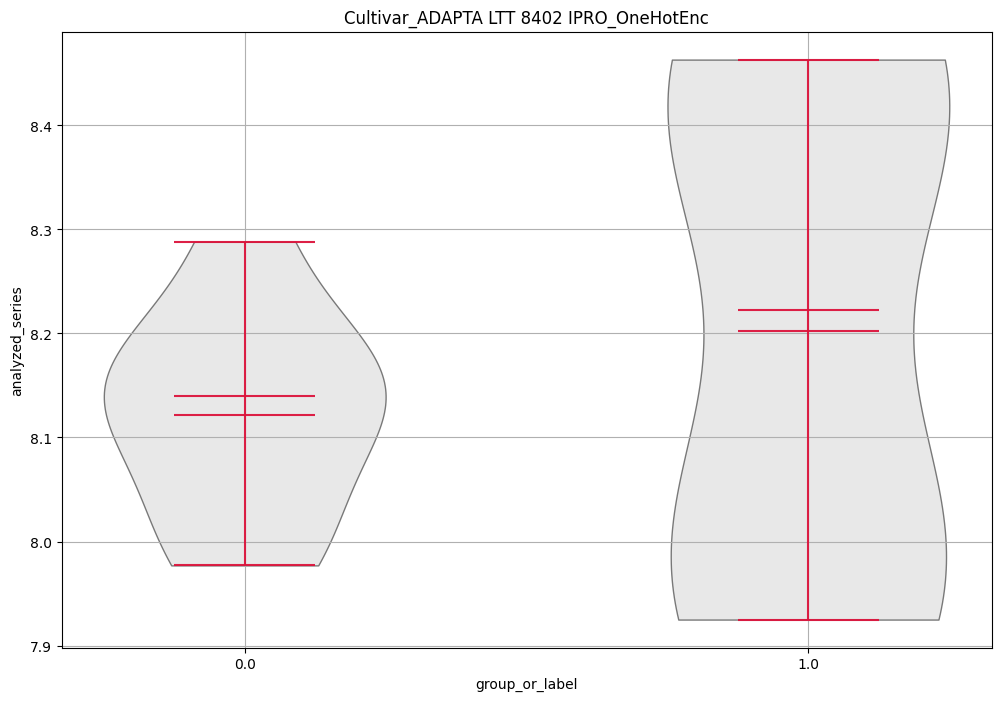



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 13.78% (p-value = 1.377760e-01)

Calculated F-statistic for the variances = 2.478275e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.126964e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

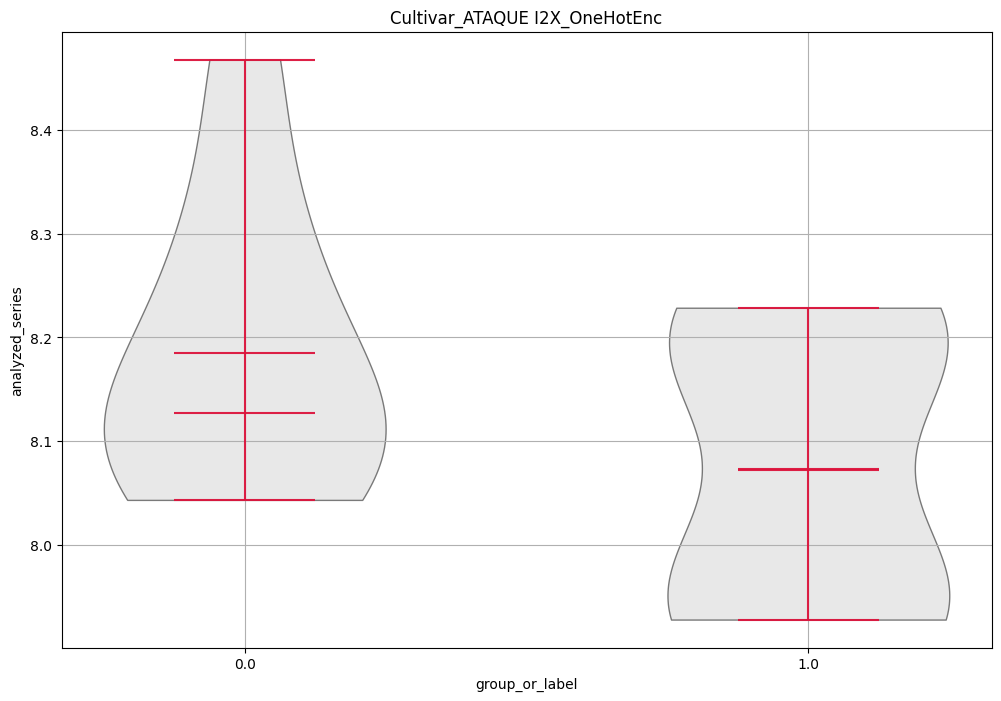



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_ATAQUE I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_ATAQUE I2X_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 15.21% (p-value = 1.520915e-01)

Calculated F-statistic for the variances = 2.303703e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.127790e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

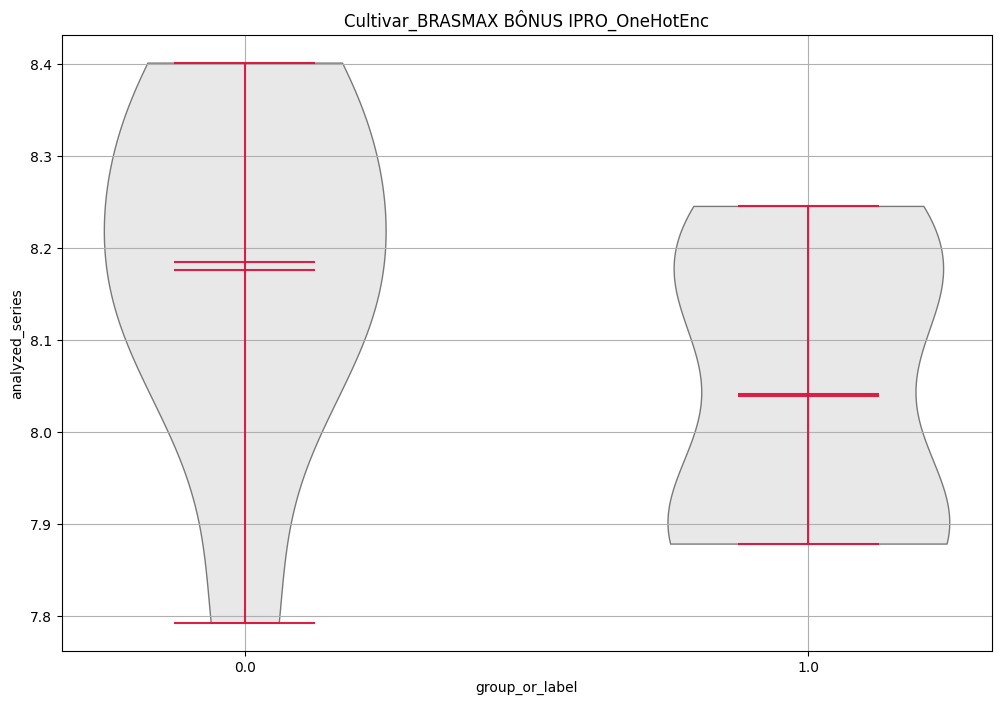



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 6.94% (p-value = 6.942405e-02)

Calculated F-statistic for the variances = 4.133637e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.121756e+00
Median value of label '0.0' = 8.128800e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

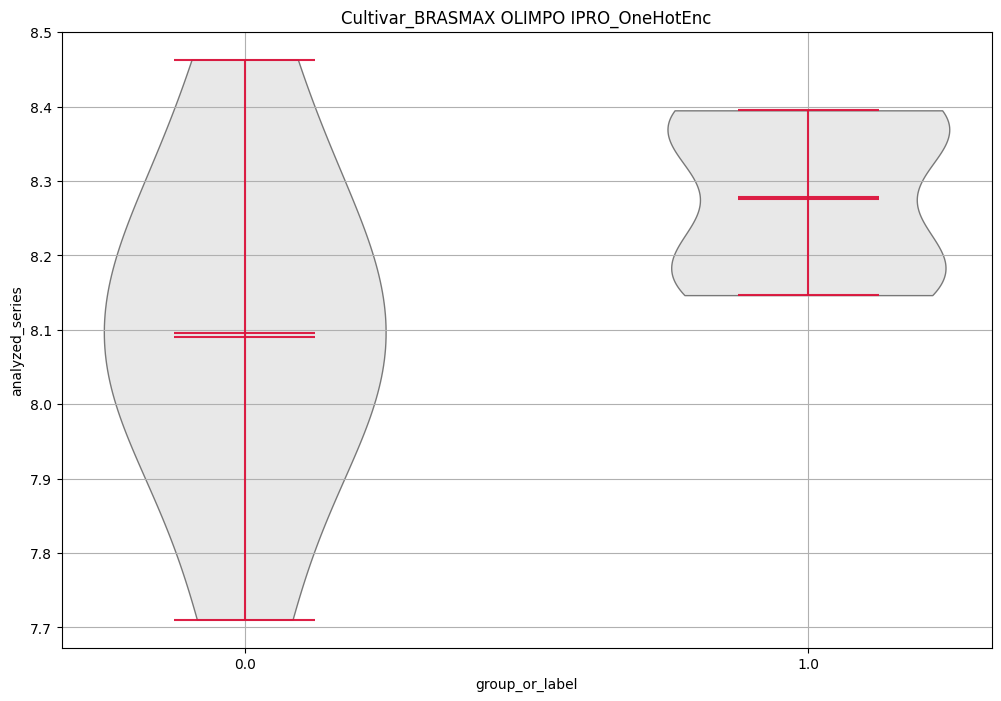



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 43.87% (p-value = 4.387269e-01)

Calculated F-statistic for the variances = 6.372759e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.126016e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

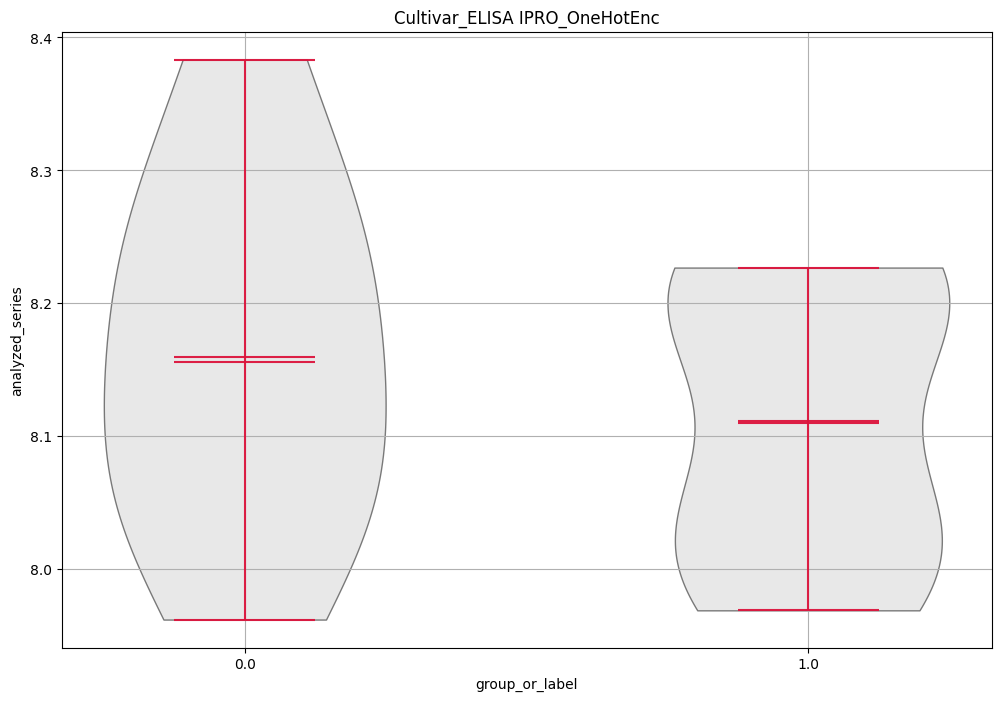



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_ELISA IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'Cultivar_ELISA IPRO_OneHotEnc'#Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 13.10% (p-value = 1.310360e-01)

Calculated F-statistic for the variances = 2.765726e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.125083e+00
Median value of label '0.0' = 8.130002e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

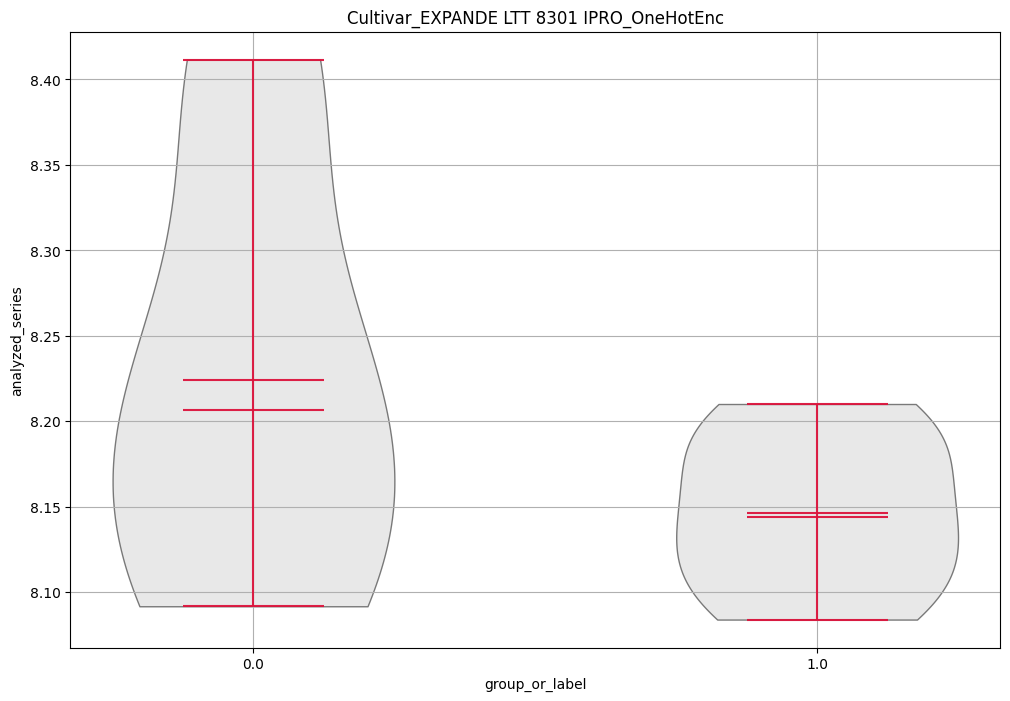



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc'#Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 5.37% (p-value = 5.370237e-02)

Calculated F-statistic for the variances = 4.452344e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.122915e+00
Median value of label '0.0' = 8.130002e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

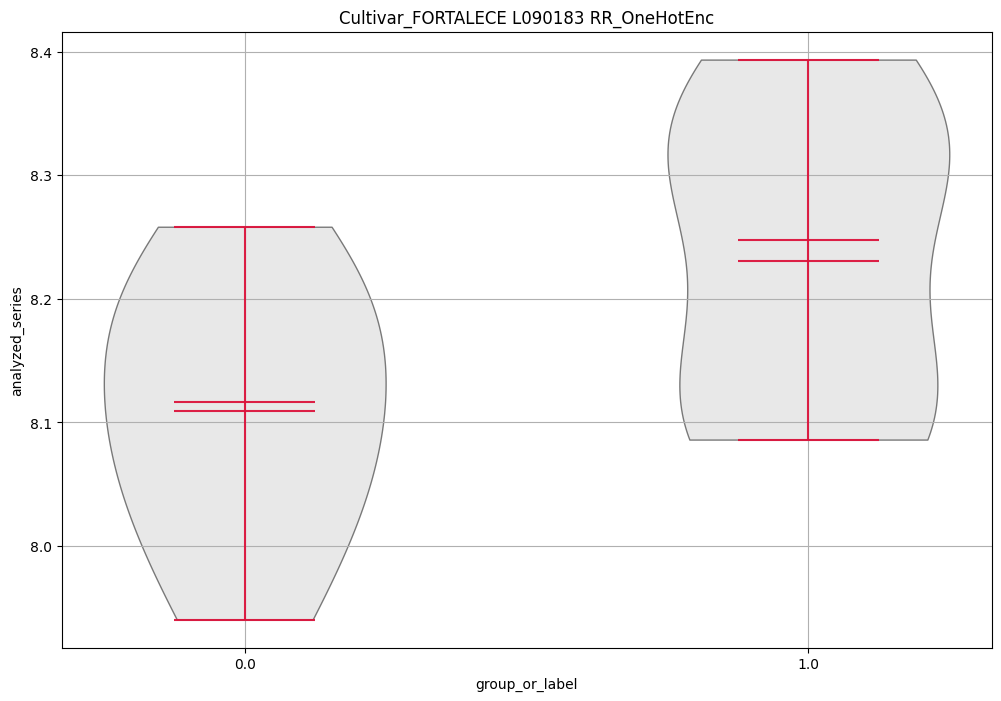



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_FORTALECE L090183 RR_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_FORTALECE L090183 RR_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 27.02% (p-value = 2.701522e-01)

Calculated F-statistic for the variances = 1.350827e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.122127e+00
Median value of label '0.0' = 8.129016e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

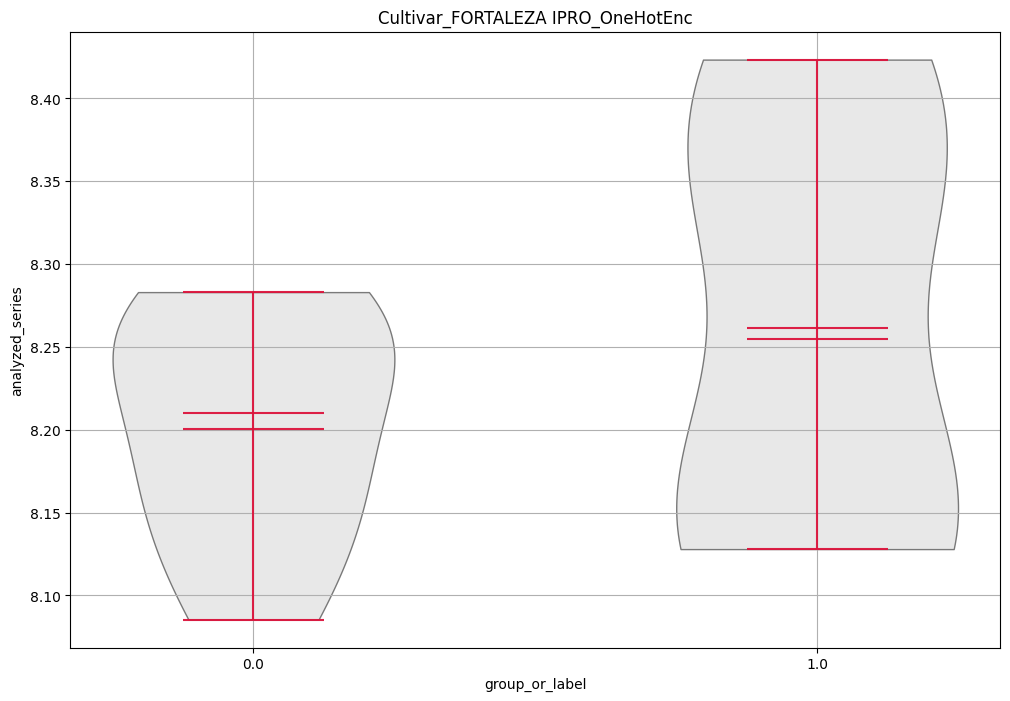



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_FORTALEZA IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_FORTALEZA IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 0.17% (p-value = 1.654878e-03)

Calculated F-statistic for the variances = 1.508106e+01

Statistics for each detected label:

Mean value of label '0.0' = 8.131321e+00
Median value of label '0.0' = 8.135632e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

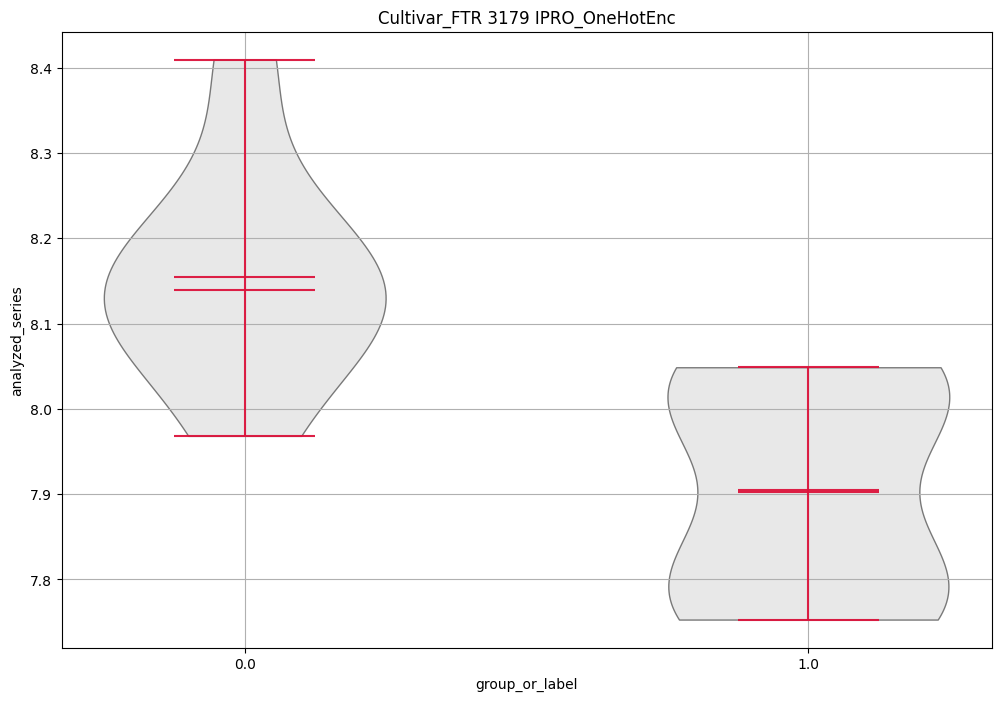



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_FTR 3179 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'Cultivar_FTR 3179 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 29.48% (p-value = 2.948497e-01)

Calculated F-statistic for the variances = 1.256113e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.123873e+00
Median value of label '0.0' = 8.128800e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

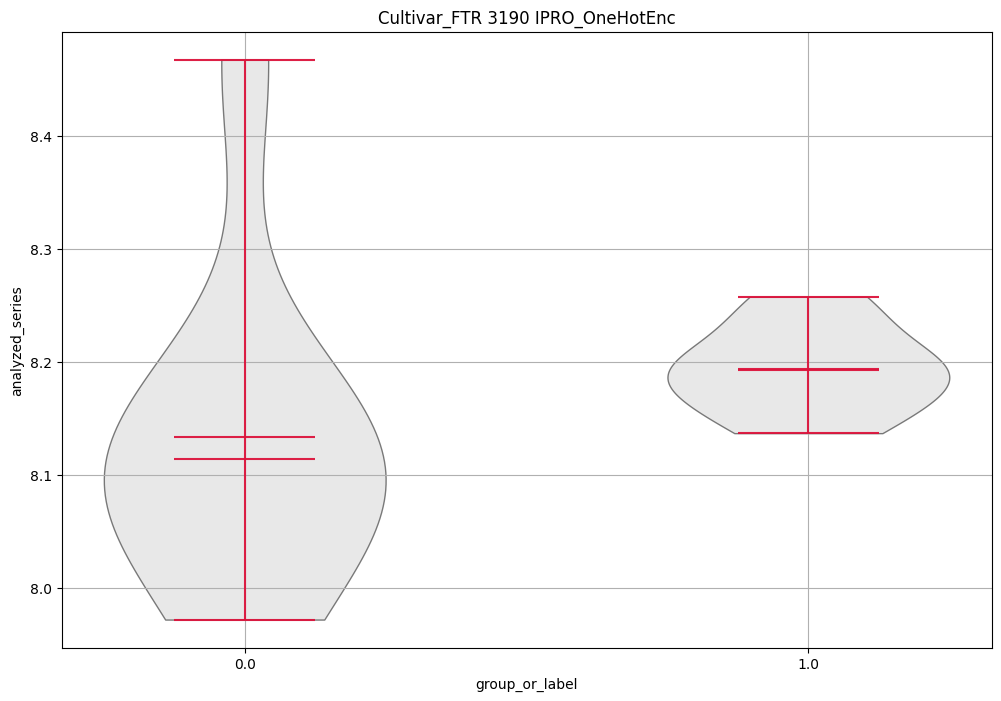



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_FTR 3190 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_FTR 3190 IPRO_OneHotEnc'#Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 97.98% (p-value = 9.798332e-01)

Calculated F-statistic for the variances = 6.627459e-04

Statistics for each detected label:

Mean value of label '0.0' = 8.126717e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

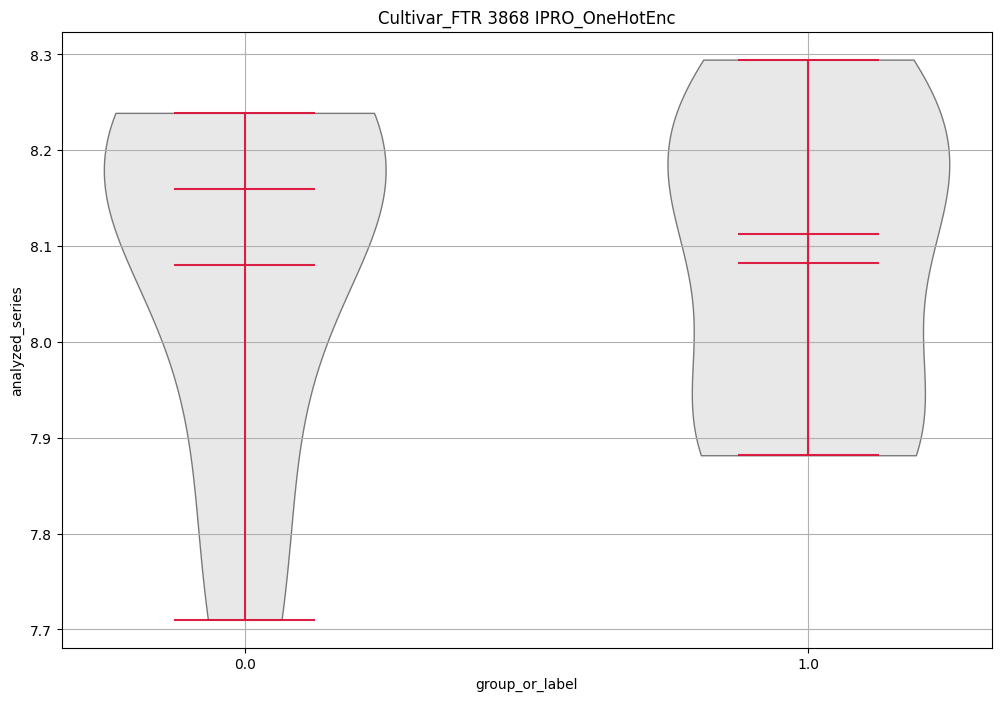



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_FTR 3868 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_FTR 3868 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 29.74% (p-value = 2.974004e-01)

Calculated F-statistic for the variances = 1.172400e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.127478e+00
Median value of label '0.0' = 8.135632e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

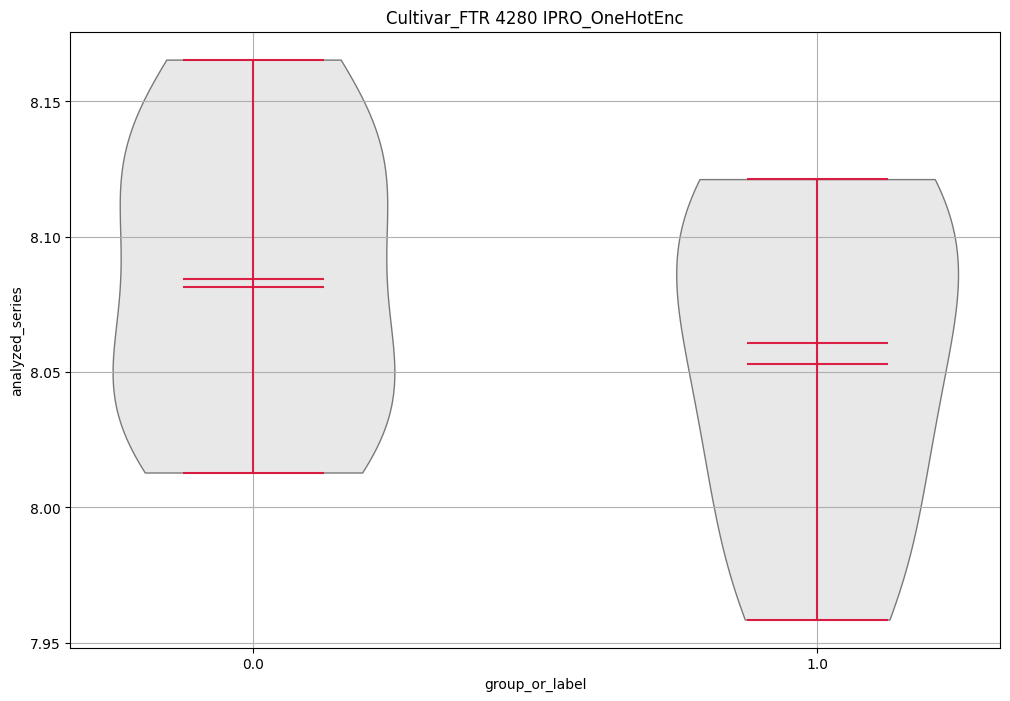



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_FTR 4280 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_FTR 4280 IPRO_OneHotEnc'  #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 75.41% (p-value = 7.540946e-01)

Calculated F-statistic for the variances = 1.042328e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.124458e+00
Median value of label '0.0' = 8.129318e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

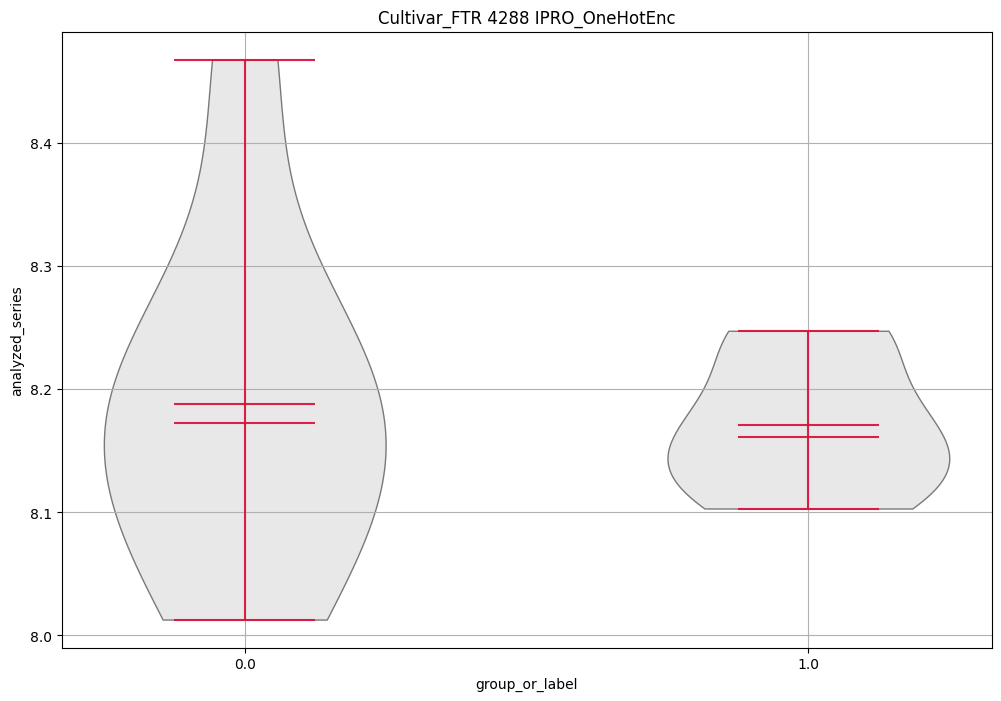



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_FTR 4288 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_FTR 4288 IPRO_OneHotEnc'  #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 68.48% (p-value = 6.847842e-01)

Calculated F-statistic for the variances = 1.753840e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.128622e+00
Median value of label '0.0' = 8.135632e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

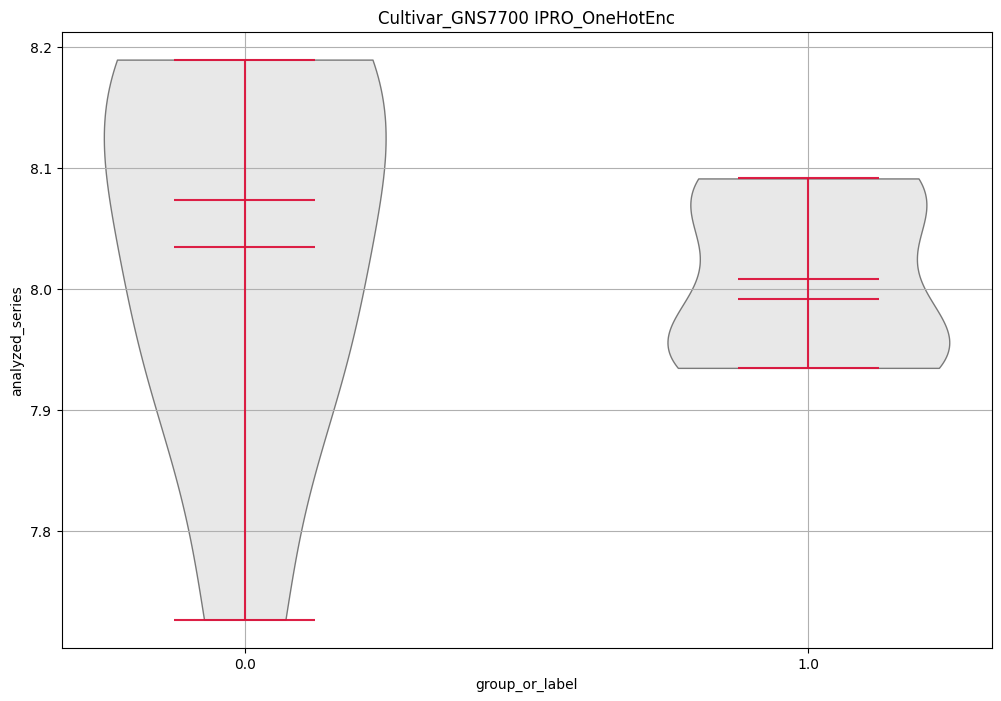



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_GNS7700 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_GNS7700 IPRO_OneHotEnc'#Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 6.86% (p-value = 6.855307e-02)

Calculated F-statistic for the variances = 3.961175e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.123628e+00
Median value of label '0.0' = 8.129016e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

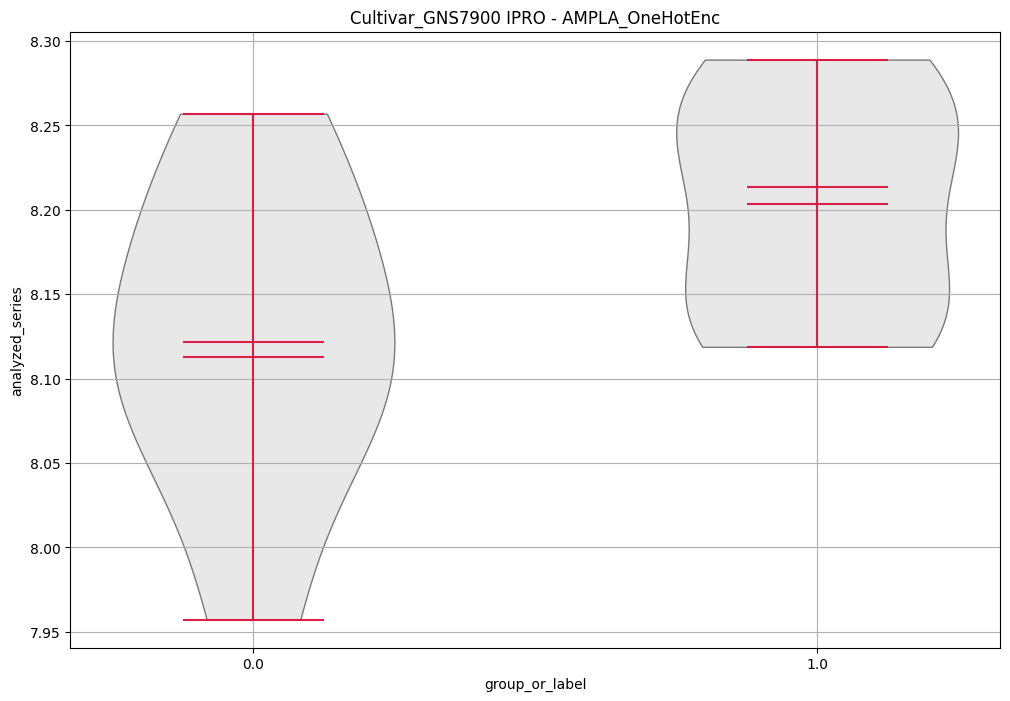



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 44.12% (p-value = 4.412148e-01)

Calculated F-statistic for the variances = 6.601910e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.127368e+00
Median value of label '0.0' = 8.135632e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

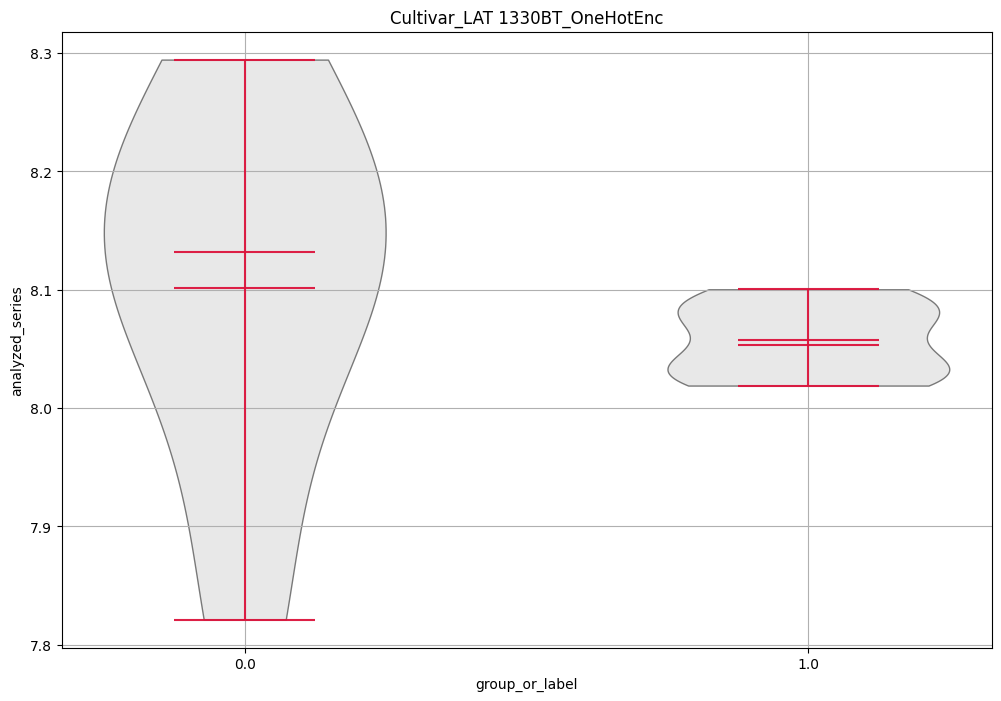



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_LAT 1330BT_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_LAT 1330BT_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 86.28% (p-value = 8.628061e-01)

Calculated F-statistic for the variances = 3.140689e-02

Statistics for each detected label:

Mean value of label '0.0' = 8.124993e+00
Median value of label '0.0' = 8.129318e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

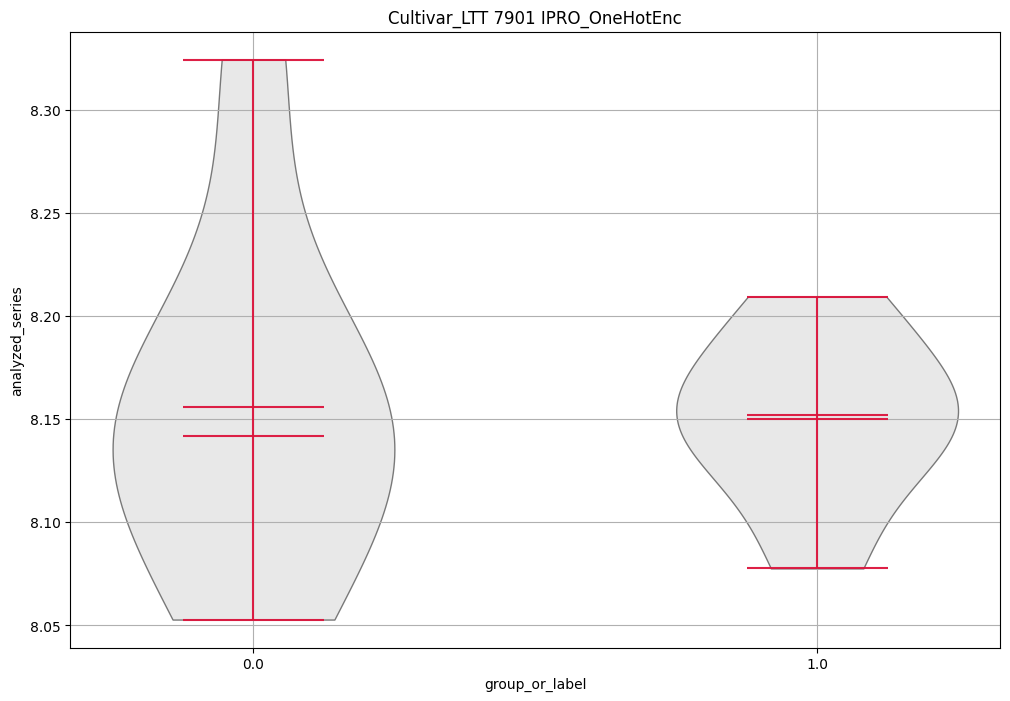



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_LTT 7901 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_LTT 7901 IPRO_OneHotEnc'#Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 82.08% (p-value = 8.207627e-01)

Calculated F-statistic for the variances = 5.351882e-02

Statistics for each detected label:

Mean value of label '0.0' = 8.124540e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

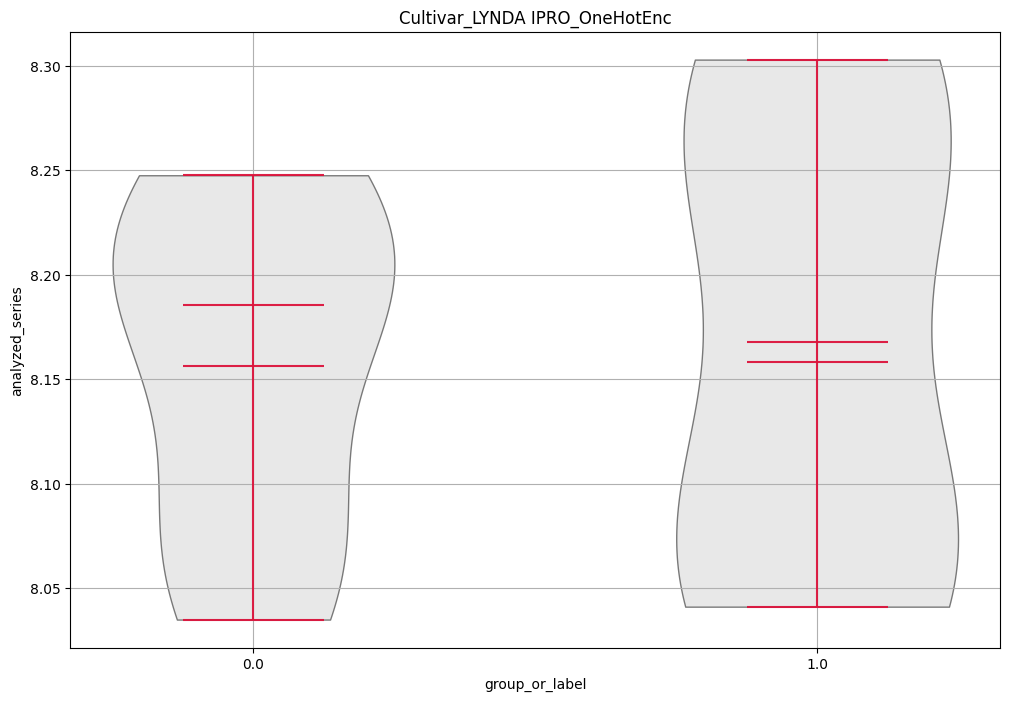



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_LYNDA IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'Cultivar_LYNDA IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 56.10% (p-value = 5.609502e-01)

Calculated F-statistic for the variances = 3.709122e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.126904e+00
Median value of label '0.0' = 8.135632e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

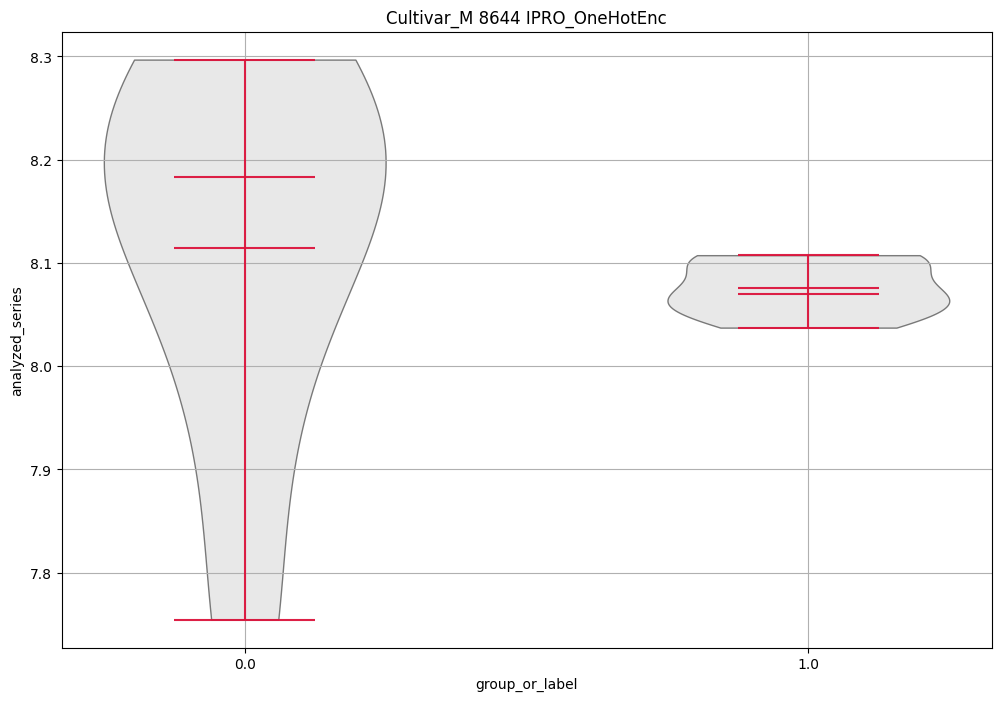



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_M 8644 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_M 8644 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 17.96% (p-value = 1.795561e-01)

Calculated F-statistic for the variances = 2.198297e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.126483e+00
Median value of label '0.0' = 8.135632e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

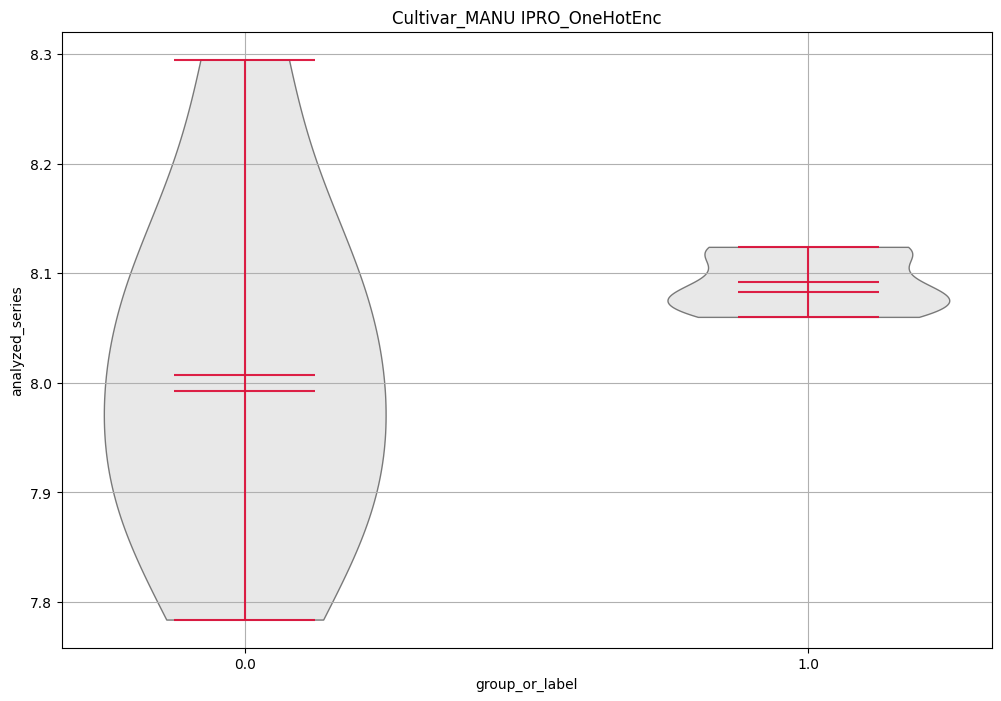



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_MANU IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_MANU IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 3.33% (p-value = 3.327115e-02)

Calculated F-statistic for the variances = 5.601183e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.122111e+00
Median value of label '0.0' = 8.129016e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

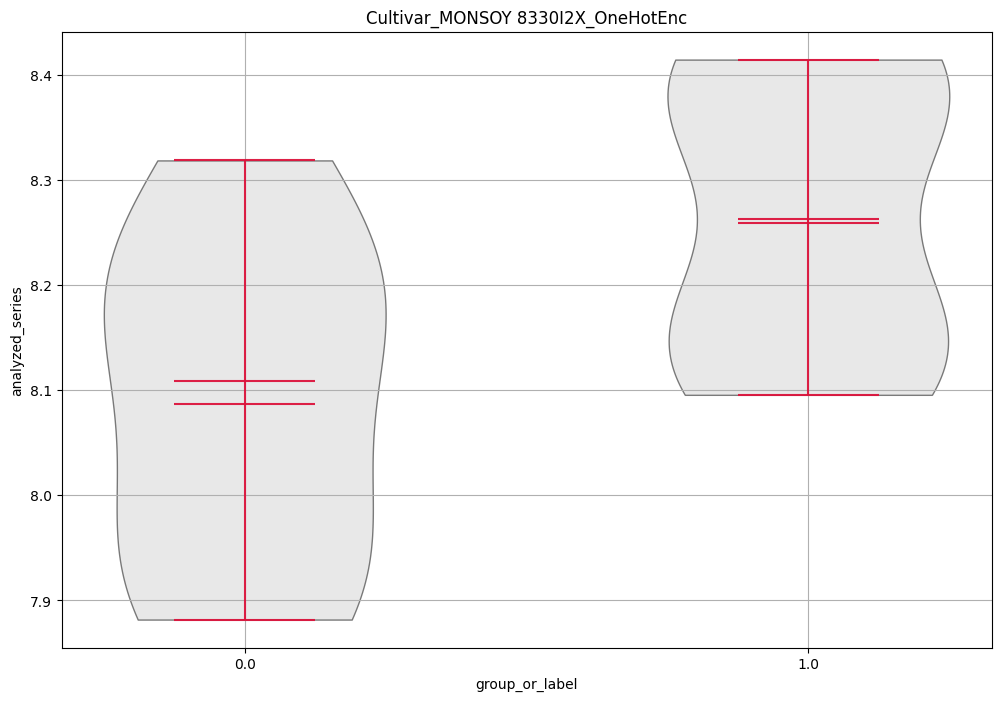



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_MONSOY 8330I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'Cultivar_MONSOY 8330I2X_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 86.51% (p-value = 8.651448e-01)

Calculated F-statistic for the variances = 3.018523e-02

Statistics for each detected label:

Mean value of label '0.0' = 8.124006e+00
Median value of label '0.0' = 8.129318e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

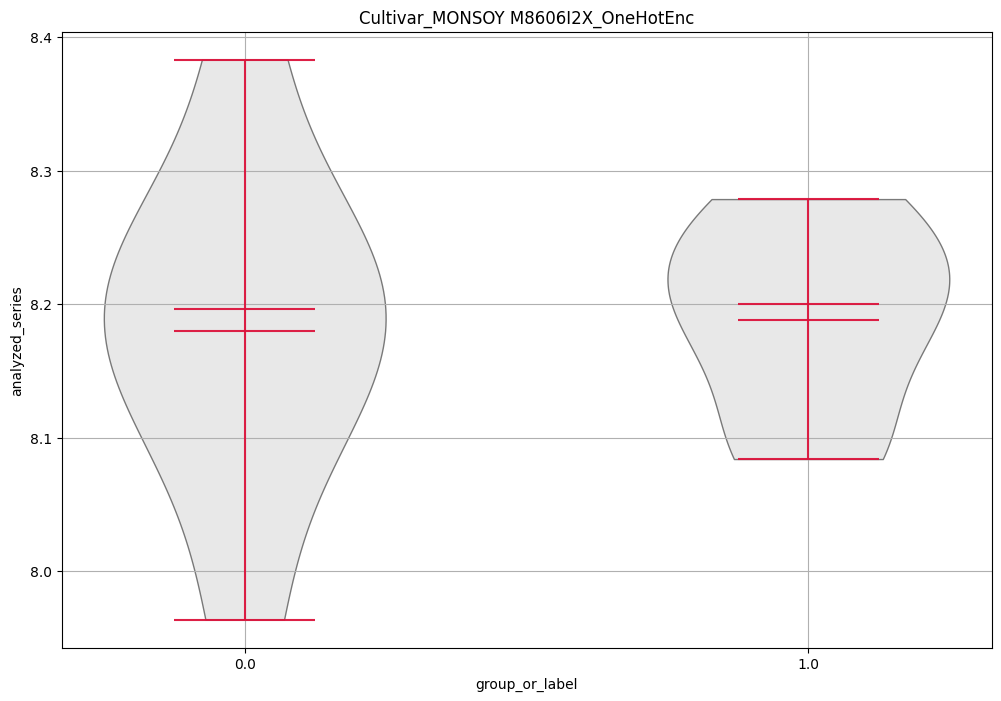



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_MONSOY M8606I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_MONSOY M8606I2X_OneHotEnc'#Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 36.00% (p-value = 3.600312e-01)

Calculated F-statistic for the variances = 9.245542e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.126344e+00
Median value of label '0.0' = 8.133223e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

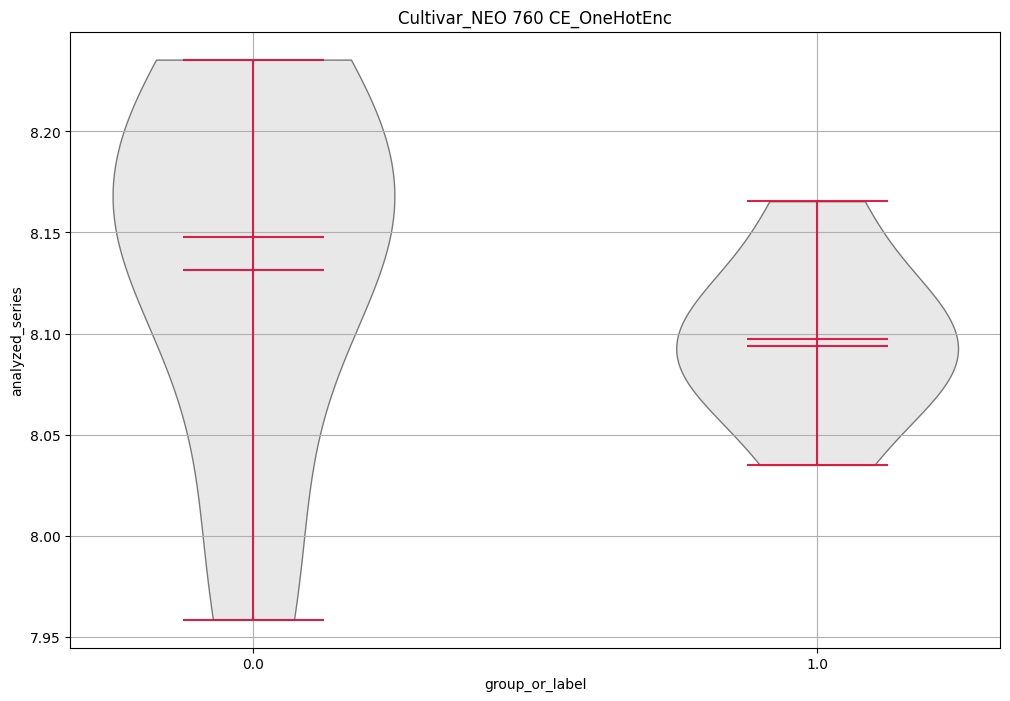



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_NEO 760 CE_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_NEO 760 CE_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 16.11% (p-value = 1.610773e-01)

Calculated F-statistic for the variances = 2.220029e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.127752e+00
Median value of label '0.0' = 8.133223e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

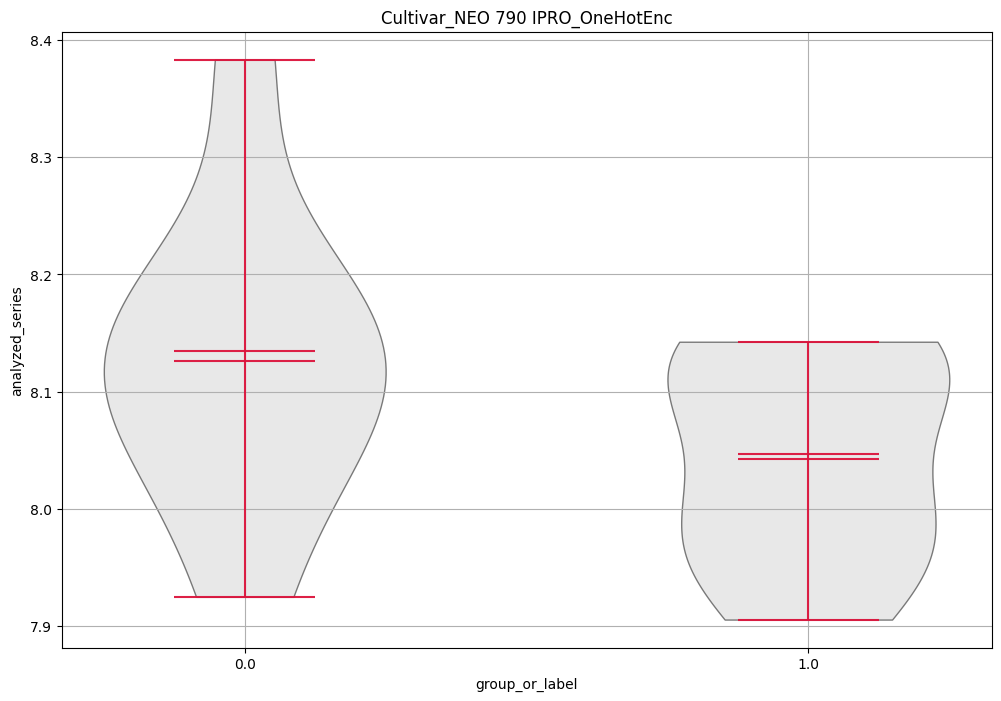



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_NEO 790 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_NEO 790 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 3.84% (p-value = 3.836164e-02)

Calculated F-statistic for the variances = 6.297411e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.122580e+00
Median value of label '0.0' = 8.128800e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

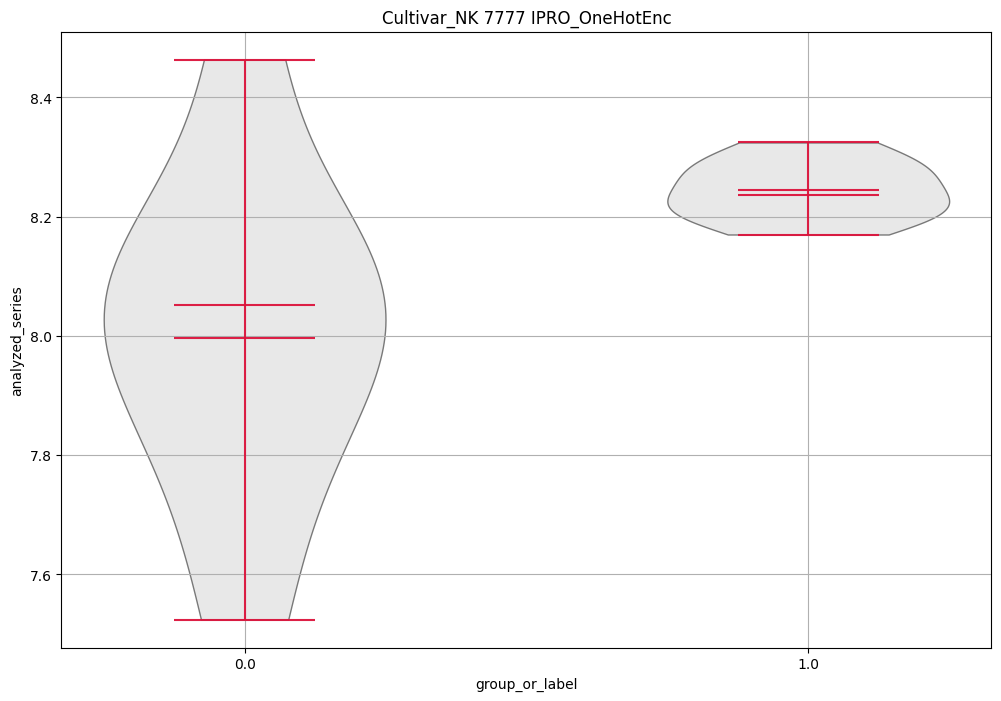



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_NK 7777 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_NK 7777 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 36.03% (p-value = 3.603184e-01)

Calculated F-statistic for the variances = 9.268029e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.126992e+00
Median value of label '0.0' = 8.133223e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

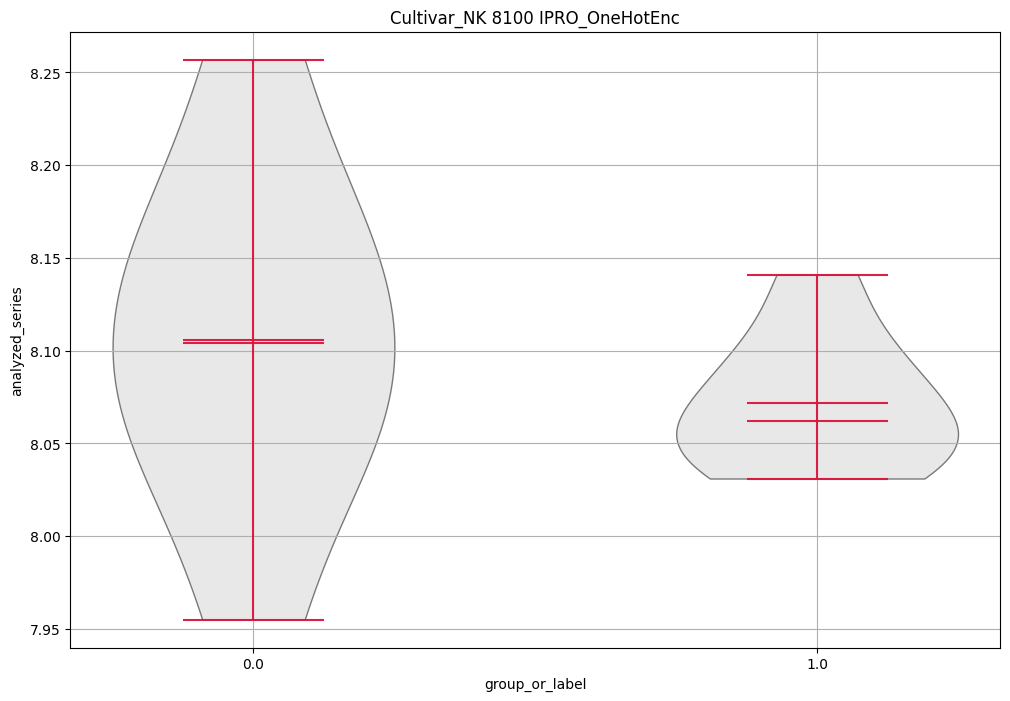



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_NK 8100 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE ='Cultivar_NK 8100 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 89.96% (p-value = 8.996475e-01)

Calculated F-statistic for the variances = 1.650678e-02

Statistics for each detected label:

Mean value of label '0.0' = 8.125005e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

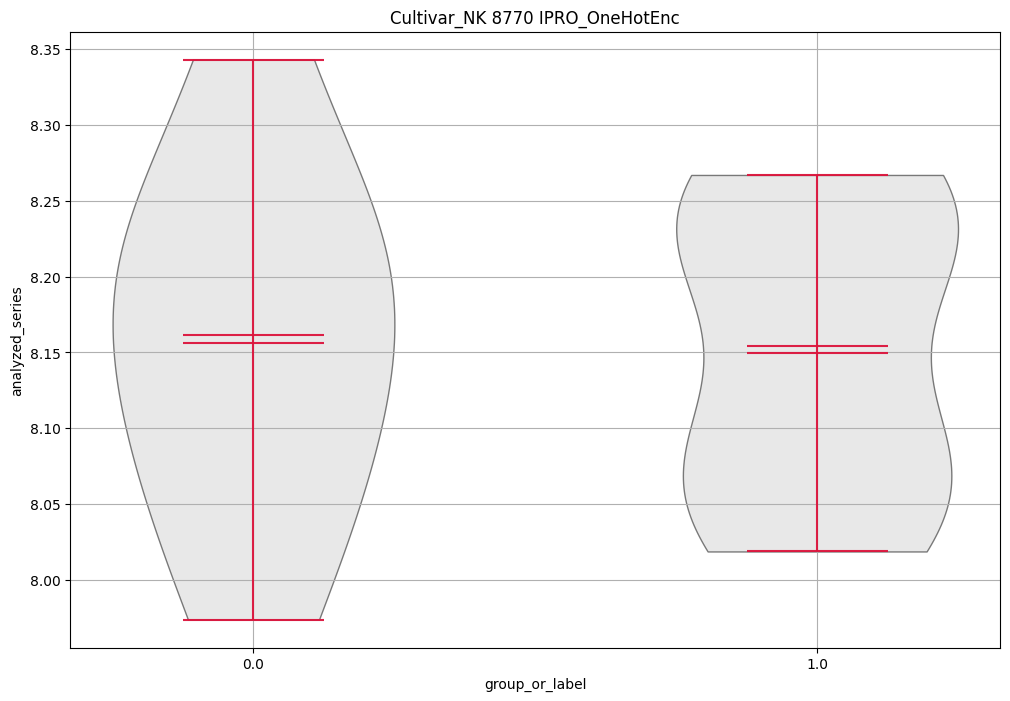



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_NK 8770 IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_NK 8770 IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 51.25% (p-value = 5.124658e-01)

Calculated F-statistic for the variances = 4.672947e-01

Statistics for each detected label:

Mean value of label '0.0' = 8.124757e+00
Median value of label '0.0' = 8.130002e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

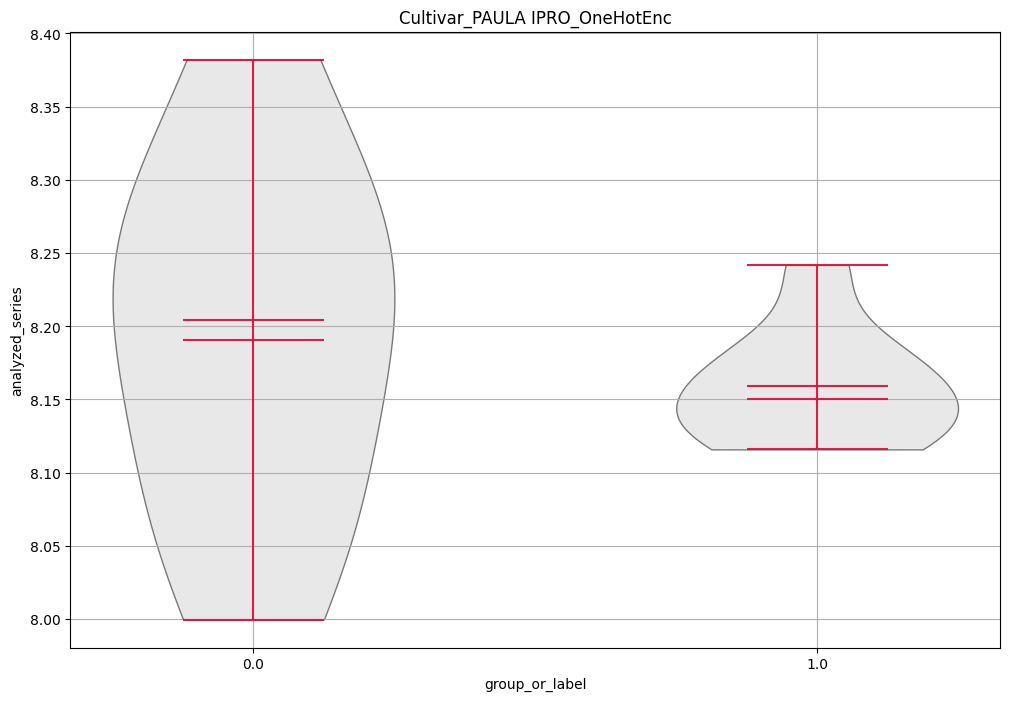



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_PAULA IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_PAULA IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 0.01% (p-value = 1.306497e-04)

Calculated F-statistic for the variances = 3.275285e+01

Statistics for each detected label:

Mean value of label '0.0' = 8.122740e+00
Median value of label '0.0' = 8.128800e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

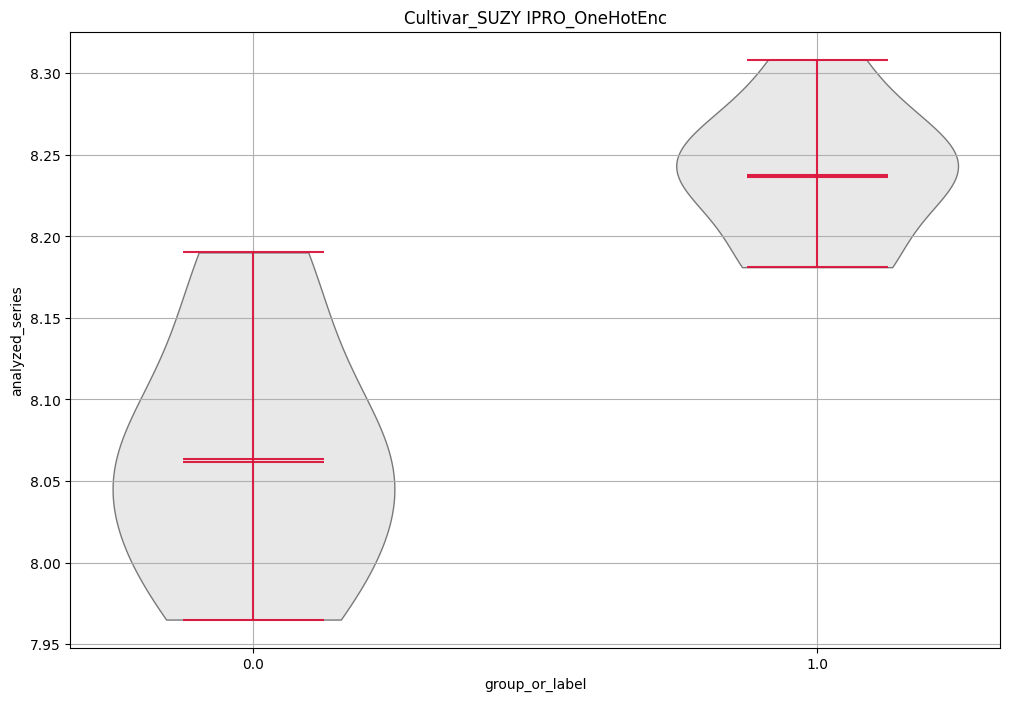



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_SUZY IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_SUZY IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 27.26% (p-value = 2.726193e-01)

Calculated F-statistic for the variances = 1.305014e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.126926e+00
Median value of label '0.0' = 8.130729e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of

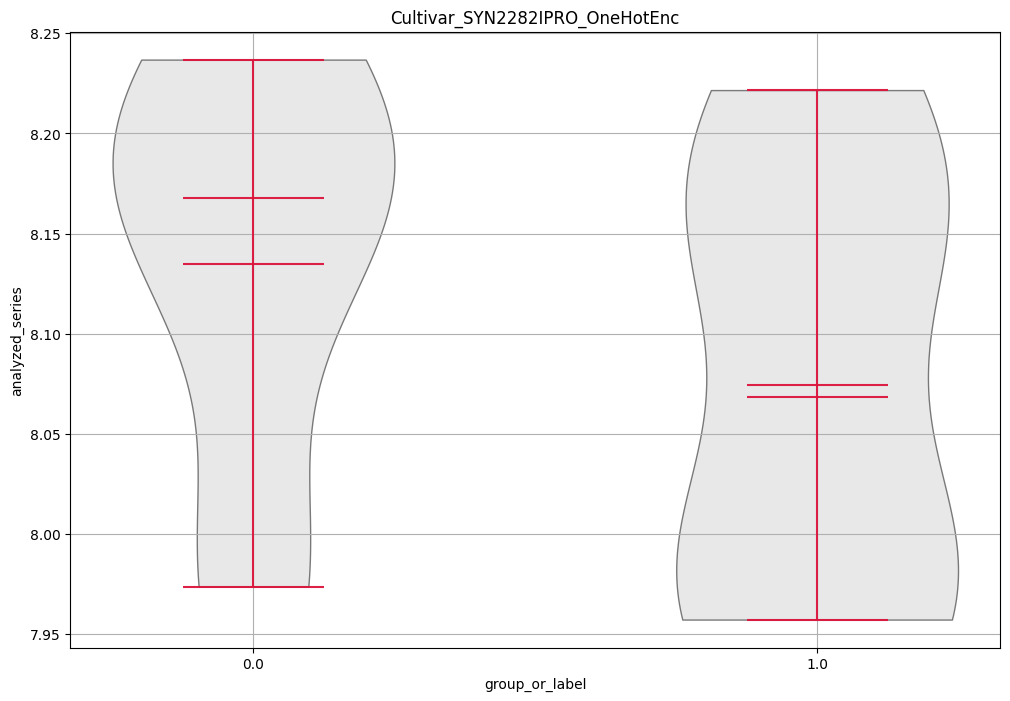



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_SYN2282IPRO_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'Cultivar_SYN2282IPRO_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

Data to be plotted in a same column.

2 different labels detected: [np.float64(0.0), np.float64(1.0)].

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 8

Probability that the means of the groups are the same = 2.02% (p-value = 2.024116e-02)

Calculated F-statistic for the variances = 7.160044e+00

Statistics for each detected label:

Mean value of label '0.0' = 8.124017e+00
Median value of label '0.0' = 8.130002e+00
Minimum value of label '0.0' = 7.338388e+00
Maximum value of 

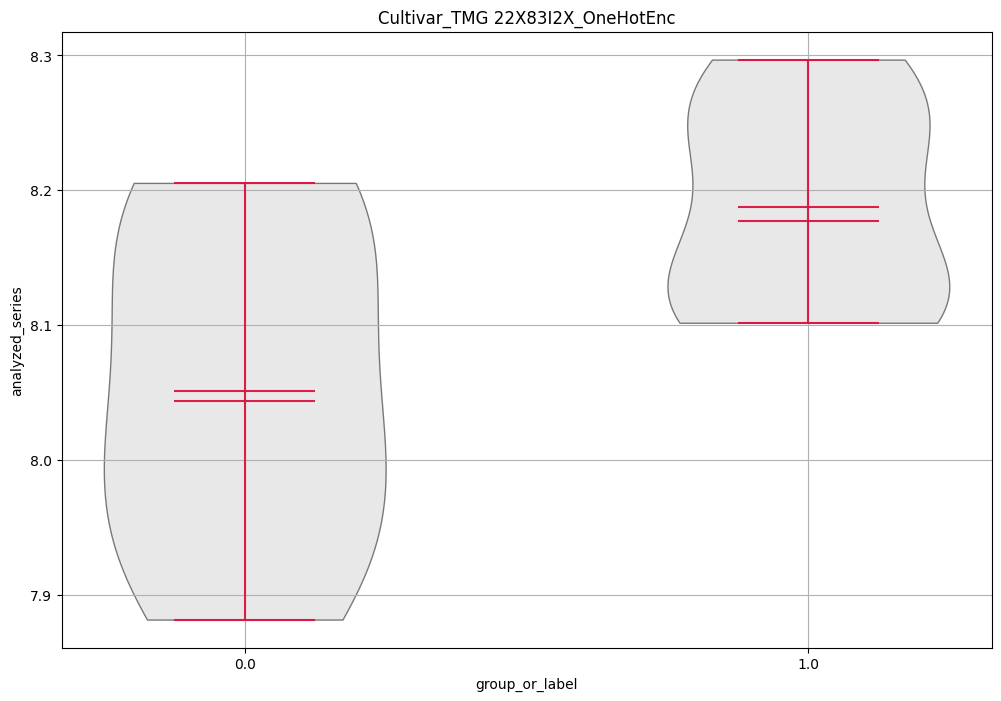



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_TMG 22X83I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': dataset['Season'], 'label': 'Lowest GYs'},
    {'values_to_analyze': high_gy['Season'], 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'Cultivar_TMG 22X83I2X_OneHotEnc' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [ ]:
# Numeric vars:
PH_log_low_GY, PH_log_high_GY = low_gy['PH_log'], high_gy['PH_log']
IFP_log_low_GY, IFP_log_high_GY = low_gy['IFP_log'], high_gy['IFP_log']
NLP_log_low_GY, NLP_log_high_GY = low_gy['NLP_log'], high_gy['NLP_log']
NGL_log_low_GY, NGL_log_high_GY = low_gy['NGL_log'], high_gy['NGL_log']
NS_log_low_GY, NS_log_high_GY = low_gy['NS_log'], high_gy['NS_log']
MHG_log_low_GY, MHG_log_high_GY = low_gy['MHG_log'], high_gy['MHG_log']

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

2 valid series input.

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 80

Probability that the means of the groups are the same = 0.58% (p-value = 5.816257e-03)

Calculated F-statistic for the variances = 7.821171e+00

Statistics for each detected label:

Mean value of label 'Lowest GYs' = 4.188940e+00
Median value of label 'Lowest GYs' = 4.192680e+00
Minimum value of label 'Lowest GYs' = 3.955082e+00
Maximum value of label 'Lowest GYs' = 4.495355e+00

Mean value of label 'Hig

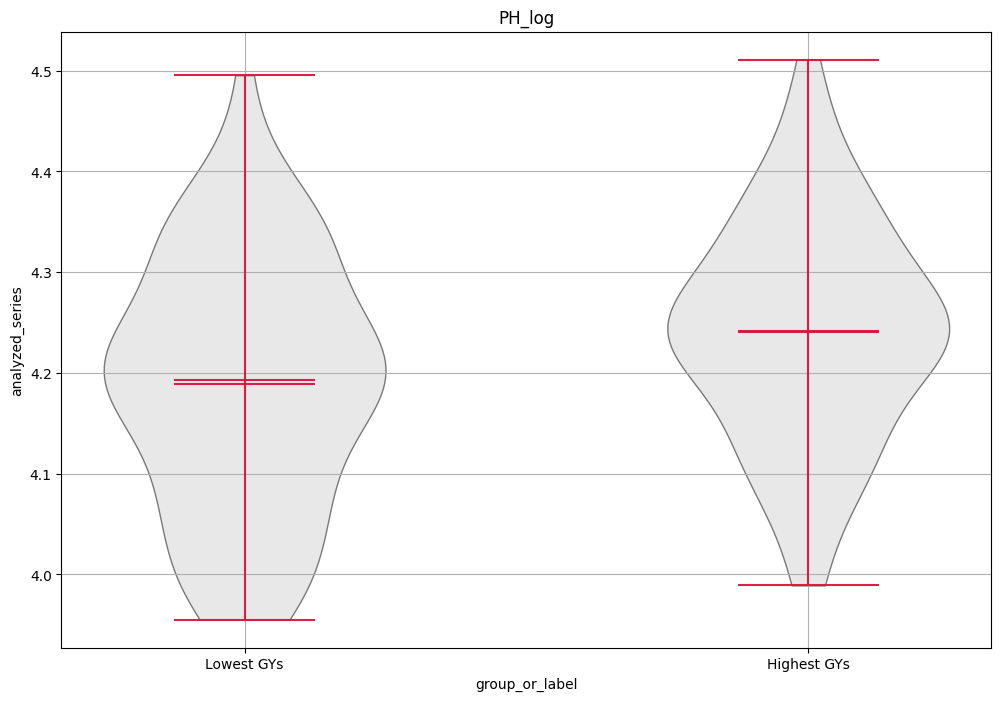



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_TMG 22X83I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': PH_log_low_GY, 'label': 'Lowest GYs'},
    {'values_to_analyze': PH_log_high_GY, 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'PH_log' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

2 valid series input.

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 80

Probability that the means of the groups are the same = 19.77% (p-value = 1.976642e-01)

Calculated F-statistic for the variances = 1.676486e+00

Statistics for each detected label:

Mean value of label 'Lowest GYs' = 2.704199e+00
Median value of label 'Lowest GYs' = 2.734368e+00
Minimum value of label 'Lowest GYs' = 2.282382e+00
Maximum value of label 'Lowest GYs' = 2.965273e+00

Mean value of label 'Hi

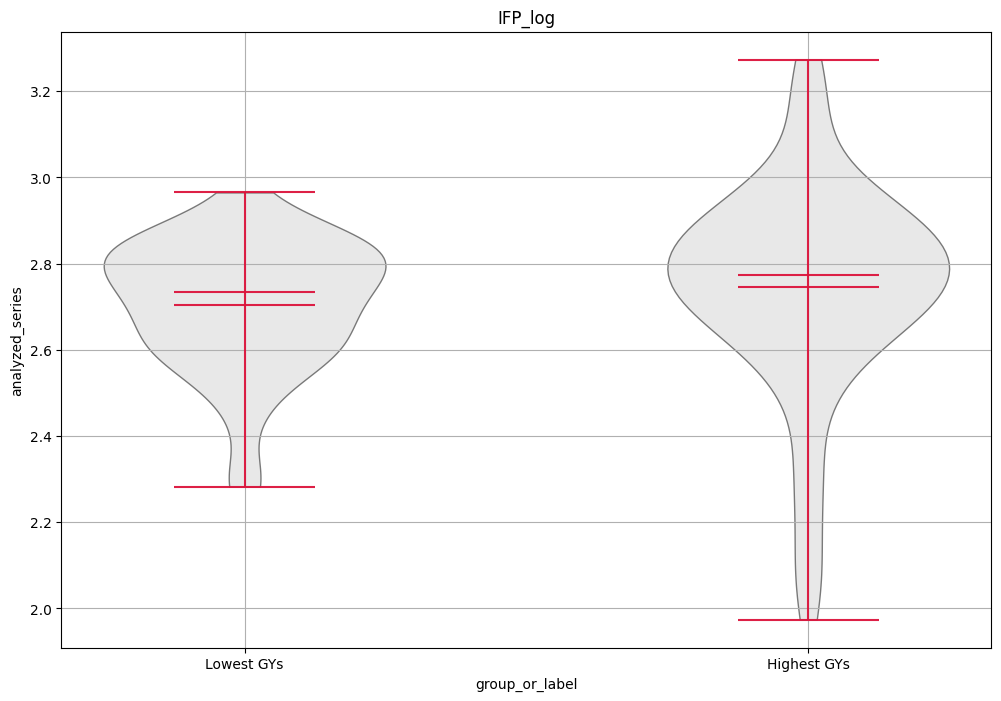



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_TMG 22X83I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': IFP_log_low_GY, 'label': 'Lowest GYs'},
    {'values_to_analyze': IFP_log_high_GY, 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'IFP_log' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

2 valid series input.

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 80

Probability that the means of the groups are the same = 0.01% (p-value = 6.109335e-05)

Calculated F-statistic for the variances = 1.704159e+01

Statistics for each detected label:

Mean value of label 'Lowest GYs' = 3.887858e+00
Median value of label 'Lowest GYs' = 3.873280e+00
Minimum value of label 'Lowest GYs' = 3.005683e+00
Maximum value of label 'Lowest GYs' = 4.401829e+00

Mean value of label 'Hig

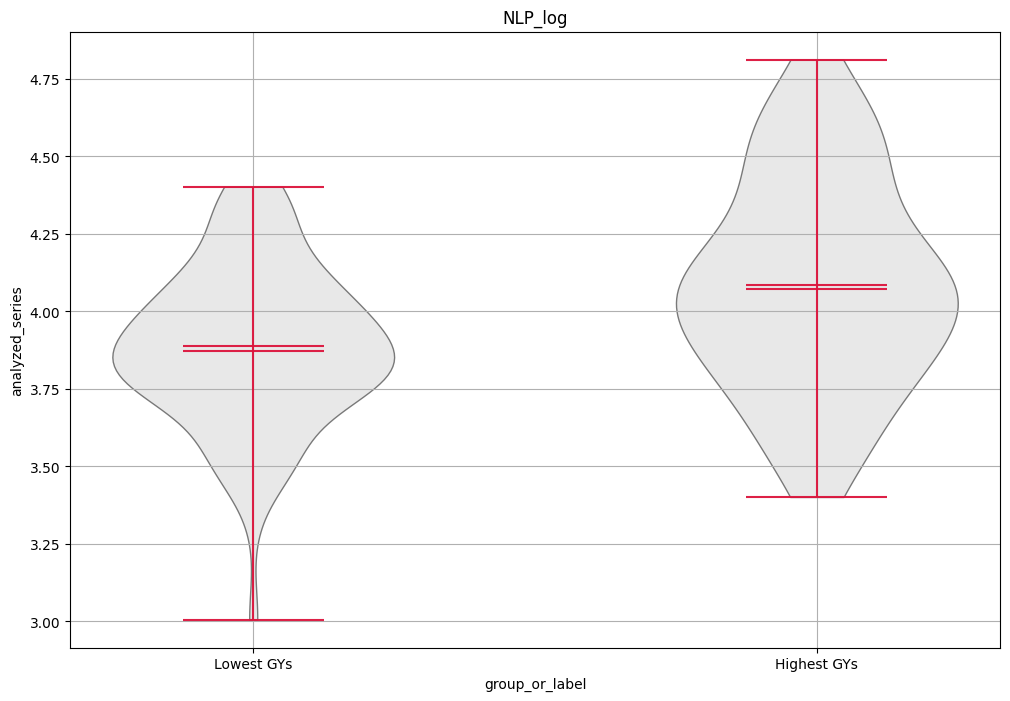



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_TMG 22X83I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': NLP_log_low_GY, 'label': 'Lowest GYs'},
    {'values_to_analyze': NLP_log_high_GY, 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'NLP_log' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

2 valid series input.

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 80

Probability that the means of the groups are the same = 7.59% (p-value = 7.592900e-02)

Calculated F-statistic for the variances = 3.199124e+00

Statistics for each detected label:

Mean value of label 'Lowest GYs' = 8.102692e-01
Median value of label 'Lowest GYs' = 8.415579e-01
Minimum value of label 'Lowest GYs' = 3.715636e-01
Maximum value of label 'Lowest GYs' = 1.007958e+00

Mean value of label 'Hig

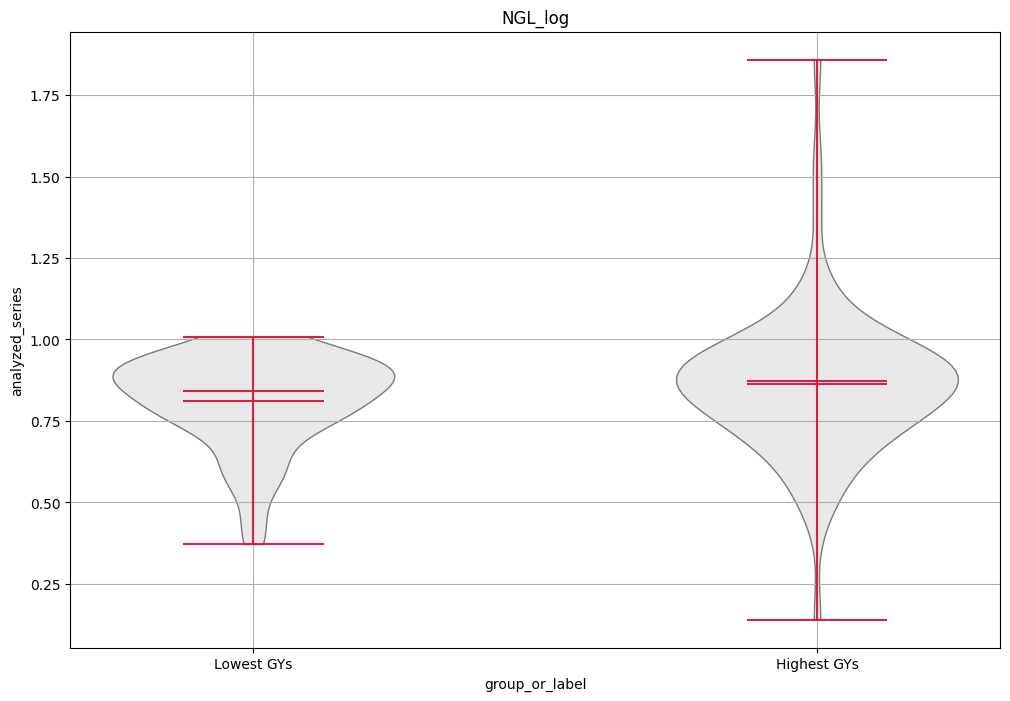



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_TMG 22X83I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': NGL_log_low_GY, 'label': 'Lowest GYs'},
    {'values_to_analyze': NGL_log_high_GY, 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'NGL_log' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

2 valid series input.

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 80

Probability that the means of the groups are the same = 2.63% (p-value = 2.633228e-02)

Calculated F-statistic for the variances = 5.028372e+00

Statistics for each detected label:

Mean value of label 'Lowest GYs' = 1.303969e+00
Median value of label 'Lowest GYs' = 1.377467e+00
Minimum value of label 'Lowest GYs' = 4.700036e-01
Maximum value of label 'Lowest GYs' = 1.916923e+00

Mean value of label 'Hig

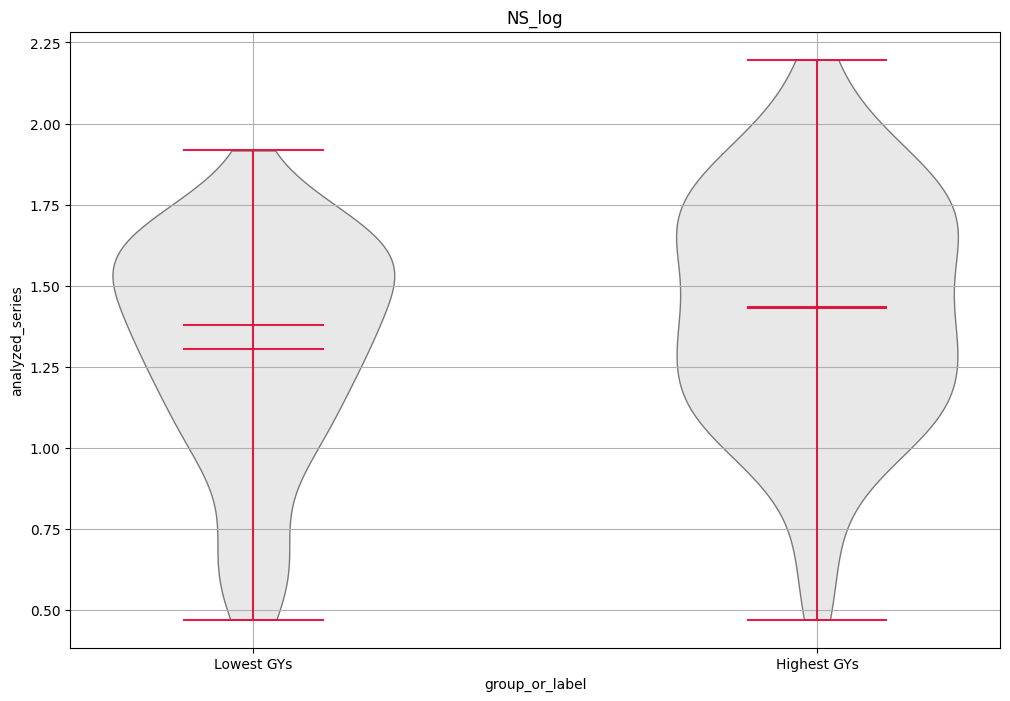



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_TMG 22X83I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': NS_log_low_GY, 'label': 'Lowest GYs'},
    {'values_to_analyze': NS_log_high_GY, 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'NS_log' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

If an error message is shown, update statsmodels to a version >= 0.13.2. To update to this version, declare and run a cell as the following command; or run it on command line without magic character '!':
!pip install statsmodels==0.13.2 --upgrade
Also, update matplotlib to a version >= 3.5.2 by running:
!pip install matplotlib==3.5.2 --upgrade

2 valid series input.

Analysis of variance (ANOVA) for the 2 detected series:

p-value: probability of verifying the tested event, given that the null hypothesis H0 is correct.

Total of samples in each group used for ANOVA (after padding): 80

Probability that the means of the groups are the same = 30.12% (p-value = 3.011838e-01)

Calculated F-statistic for the variances = 1.076120e+00

Statistics for each detected label:

Mean value of label 'Lowest GYs' = 5.096231e+00
Median value of label 'Lowest GYs' = 5.083972e+00
Minimum value of label 'Lowest GYs' = 4.860200e+00
Maximum value of label 'Lowest GYs' = 5.362418e+00

Mean value of label 'Hi

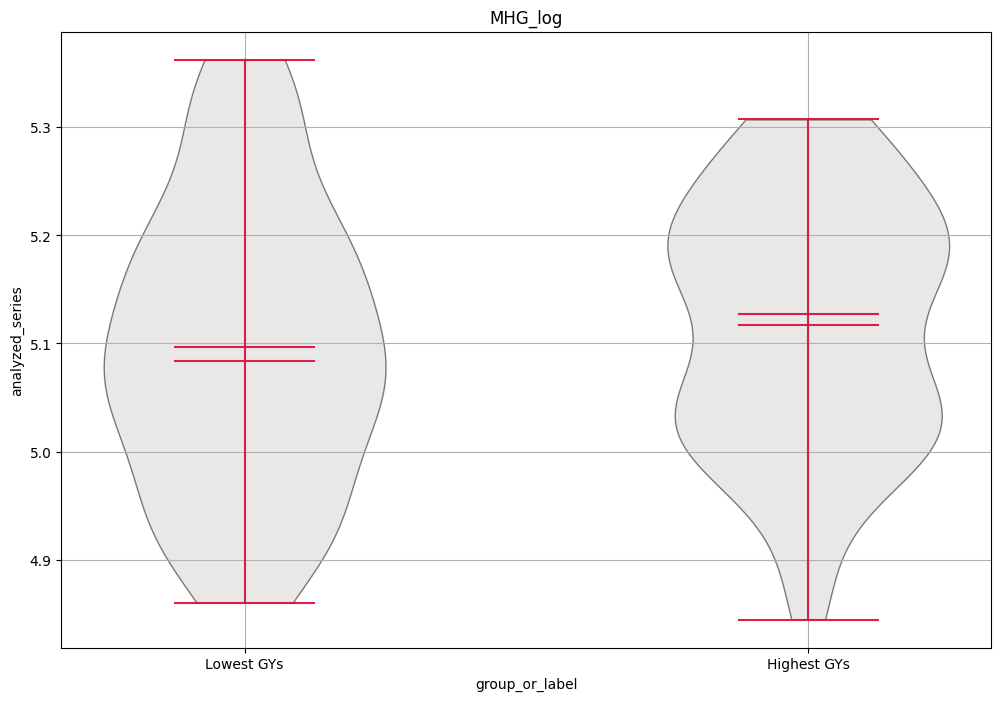



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots;
# ORIENTATION = 'horizontal', for horizontal plots.

REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'Cultivar_TMG 22X83I2X_OneHotEnc' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'GY_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names)
# are strings, so declare in quotes.
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare.
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory:
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).

# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [

    {'values_to_analyze': MHG_log_low_GY, 'label': 'Lowest GYs'},
    {'values_to_analyze': MHG_log_high_GY, 'label': 'Highest GYs'},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},
    {'values_to_analyze': None, 'label': None},

]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries.
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string).
# If you do not want to declare a series, simply keep as None, but do not remove or rename a
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label
# (you can pass 'label': None, but if values_to_analyze' is None, the new
# dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE =
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'},
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# Manipulate parameter notch (boolean, default: False) from the boxplot object
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True),
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE =  'MHG_log' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = ""
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png'
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

# Important covariates: impact on the response variable

- 'Cultivar_82I78RSF IPRO_OneHotEnc': 0 for higher avgs
- 'Cultivar_83IX84RSF I2X_OneHotEnc': 1 for higher avgs
- 'Cultivar_96R29 IPRO_OneHotEnc': 0 for higher avgs
- 'Cultivar_97Y97 IPRO_OneHotEnc': 0 for higher avgs
- 'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc': 1 for higher avgs
- 'Cultivar_FORTALECE L090183 RR_OneHotEnc': 1 for higher avgs
- 'Cultivar_FTR 3179 IPRO_OneHotEnc': 0 for higher avgs
- 'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc': 1 for higher avgs
- 'Cultivar_MONSOY 8330I2X_OneHotEnc': 1 for higher avgs
- 'Cultivar_NK 7777 IPRO_OneHotEnc': 1 for higher avgs
- 'Cultivar_SUZY IPRO_OneHotEnc': 1 for higher avgs
- 'Cultivar_TMG 22X83I2X_OneHotEnc': 1 for higher avgs

````Numeric vars: Pick the group with highest Avgs for GY and the group with lowest avgs. Check if there is difference between the mean value of the variable being tested for each of these groups. If there is: the higher GYs are associated with lower or with higher mean values of the variable being tested?````

- 'PH_log': highest for higher avgs - keep 'PH_log' above 4.241278; avoid 'PH_log' below 4.188940
- 'NLP_log': highest for higher avgs - keep 'NLP_log' above 4.084601; avoid 'NLP_log' below 3.887858
  - Important to notice: NGP was dropped because it is linearly related to NLP
- 'NGL_log': highest for higher avgs - keep 'NGL_log' above 0.8631485; avoid 'NGL_log' below 0.8102692
- 'NS_log': highest for higher avgs - keep 'NS_log' above 1.430071; avoid 'NS_log' below 1.303969



In [ ]:
dataset.columns

Index(['timestamp', 'Season', 'Repetition', 'f1_sin', 'f1_cos', 'f2_sin',
       'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
       'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos',
       'Cultivar_74K75RSF CE_OneHotEnc',
       'Cultivar_77HO111I2X - GUAPORÉ_OneHotEnc',
       'Cultivar_79I81RSF IPRO_OneHotEnc',
       'Cultivar_82HO111 IPRO - HO COXIM IPRO_OneHotEnc',
       'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc',
       'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
       'Cultivar_98R30 CE_OneHotEnc',
       'Cultivar_ADAPTA LTT 8402 IPRO_OneHotEnc',
       'Cultivar_ATAQUE I2X_OneHotEnc',
       'Cultivar_BRASMAX BÔNUS IPRO_OneHotEnc',
       'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc',
       'Cultivar_ELISA IPRO_OneHotEnc',
       'Cultivar_EXPANDE LTT 8301 IPRO_OneHotEnc',
       'Cultivar_FORTALECE L090183 RR_OneHotEnc',
       'Cultivar_FORTALEZA IPRO_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneH

In [ ]:
'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc', 'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc', 'Cultivar_FORTALECE L090183 RR_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneHotEnc',
'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc', 'Cultivar_MONSOY 8330I2X_OneHotEnc', 'Cultivar_NK 7777 IPRO_OneHotEnc',
'Cultivar_SUZY IPRO_OneHotEnc', 'Cultivar_TMG 22X83I2X_OneHotEnc'

In [3]:
# Keep frequency and clustering information, as well as the important covariates.
# Keep timestamp to guarantee uniqueness
dataset = dataset[['timestamp', 'f1_sin', 'f1_cos', 'f2_sin',
        'f2_cos', 'f3_sin', 'f3_cos', 'f4_sin', 'f4_cos', 'f5_sin', 'f5_cos',
        'f6_sin', 'f6_cos', 'f7_sin', 'f7_cos', 'f8_sin', 'f8_cos', 'cluster',
        'Cultivar_82I78RSF IPRO_OneHotEnc', 'Cultivar_83IX84RSF I2X_OneHotEnc', 'Cultivar_96R29 IPRO_OneHotEnc', 'Cultivar_97Y97 IPRO_OneHotEnc',
        'Cultivar_BRASMAX OLIMPO IPRO_OneHotEnc', 'Cultivar_FORTALECE L090183 RR_OneHotEnc', 'Cultivar_FTR 3179 IPRO_OneHotEnc',
        'Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc', 'Cultivar_MONSOY 8330I2X_OneHotEnc', 'Cultivar_NK 7777 IPRO_OneHotEnc',
        'Cultivar_SUZY IPRO_OneHotEnc', 'Cultivar_TMG 22X83I2X_OneHotEnc',
        'PH_log', 'NLP_log', 'NGL_log', 'NS_log', 'GY_log']]

dataset

,timestamp,f1_sin,f1_cos,f2_sin,f2_cos,f3_sin,f3_cos,f4_sin,f4_cos,f5_sin,...,Cultivar_GNS7900 IPRO - AMPLA_OneHotEnc,Cultivar_MONSOY 8330I2X_OneHotEnc,Cultivar_NK 7777 IPRO_OneHotEnc,Cultivar_SUZY IPRO_OneHotEnc,Cultivar_TMG 22X83I2X_OneHotEnc,PH_log,NLP_log,NGL_log,NS_log,GY_log
0,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.004290,-0.702542,...,0.0,0.0,0.0,0.0,0.0,4.074142,4.587006,0.593327,1.648659,8.081110
1,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.004290,-0.702542,...,0.0,0.0,0.0,0.0,0.0,4.396915,4.593098,0.559616,2.001480,8.080544
2,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.004290,-0.702542,...,0.0,0.0,0.0,0.0,0.0,3.955082,4.171306,0.832909,1.974081,8.199865
3,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.004290,-0.702542,...,0.0,0.0,1.0,0.0,0.0,3.988984,4.409155,0.982078,2.104134,8.324278
4,2022-12-01,-0.708622,0.705588,-0.883308,0.468794,-0.925106,0.379709,-0.999991,-0.004290,-0.702542,...,1.0,0.0,0.0,0.0,0.0,4.010963,3.891820,0.494696,1.280934,8.141289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2023-04-01,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,0.947278,-0.469961,...,0.0,0.0,0.0,0.0,0.0,4.126005,3.594569,0.908259,1.098612,8.102990
316,2023-04-01,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,0.947278,-0.469961,...,0.0,0.0,0.0,0.0,0.0,4.240895,4.580877,1.115142,1.481605,8.278761
317,2023-04-01,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,0.947278,-0.469961,...,0.0,0.0,0.0,0.0,0.0,4.495355,4.261693,0.751416,1.098612,8.018688
318,2023-04-01,-0.162360,0.986732,-0.222364,0.974964,-0.242191,0.970229,-0.320412,0.947278,-0.469961,...,0.0,0.0,0.0,0.0,0.0,4.481080,4.327174,0.609766,1.300192,8.116396


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [4]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset4"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file"
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset4 exported as CSV file to notebook's workspace as 'dataset4.csv'.


## **Exporting dataframes as Excel file tables**

In [ ]:
## WARNING: all files exported from this function are .xlsx

FILE_NAME_WITHOUT_EXTENSION = "datasets"
# (string, in quotes): input the name of the
# file without the extension. e.g. new_file_name_without_extension = "my_file"
# will export a file 'my_file.xlsx' to notebook's workspace.

EXPORTED_TABLES = [{'dataframe_obj_to_be_exported': None,
                    'excel_sheet_name': None},]

# exported_tables is a list of dictionaries. User may declare several dictionaries,
# as long as the keys are always the same, and if the values stored in keys are not None.

# key 'dataframe_obj_to_be_exported': dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: dataframe_obj_to_be_exported = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

# key 'excel_sheet_name': string containing the name of the sheet to be written on the
# exported Excel file. Example: excel_sheet_name = 'tab_1' will save the dataframe in the
# sheet 'tab_1' from the file named as file_name_without_extension.

# examples: exported_tables = [{'dataframe_obj_to_be_exported': dataset1,
# 'excel_sheet_name': 'sheet1'},]
# will export only dataset1 as 'sheet1';
# exported_tables = [{'dataframe_obj_to_be_exported': dataset1, 'excel_sheet_name': 'sheet1'},
# {'dataframe_obj_to_be_exported': dataset2, 'excel_sheet_name': 'sheet2']
# will export dataset1 as 'sheet1' and dataset2 as 'sheet2'.

# Notice that if the file does not contain the exported sheets, they will be created. If it has,
# the sheets will be replaced.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = ""
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None


export_pd_dataframe_as_excel (file_name_without_extension = FILE_NAME_WITHOUT_EXTENSION, exported_tables = EXPORTED_TABLES, file_directory_path = FILE_DIRECTORY_PATH)

****